# <a id='toc1_'></a>[analyze data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [analyze data](#toc1_)    
  - [condensed data](#toc1_1_)    
  - [🕹️ interactive](#toc1_2_)    
  - [descriptive stats](#toc1_3_)    
  - [slides](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls, hlp
import duckdb as ddb

hlp.show_package_version(["pygwalker"])

os.environ["THEME"]="light"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

con = ddb.connect()

🐍 3.12.2 | 📦 pygwalker: 0.4.9.14 | 📦 pandas: 2.2.3 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.2.1 | 📦 pandas-plots: 0.12.17 | 📦 connection_helper: 0.8.15


## <a id='toc1_1_'></a>[condensed data](#toc0_)
- defined columns have been transformed

🔵 *** df: condensed ***
🟣 shape: (195, 62) columns: ['Participant ID' '[01.01] CTCAE' '[01.02] Datum_AE'
 '[01.03] Sportassoziation' '[02.01] Datum_Aufnahme' '[02.02] Art'
 '[02.03] Auslöser' '[02.04] Körperteil' '[03.01.01] Schmerzen_Intensität'
 '[03.01.02] Schmerzen_Dauer' '[03.01] Schmerzen_Folge'
 '[03.02.01] Krankenhaus_Intensität' '[03.02.02] Krankenhaus_Dauer'
 '[03.02] Krankenhaus_Folge' '[03.03.01] Med_Weiterbehandlung_Intensität'
 '[03.03.02] Med_Weiterbehandlung_Dauer'
 '[03.03] Med_Weiterbehandlung_Folge' '[03.04] Therapieprotokoll_Folge'
 '[03.05] Lebensnotwendige_Intenvention_Folge'
 '[03.06.01] Pflege_Intensität' '[03.06.02] Pflege_Dauer'
 '[03.06] Pflege_Folge' '[03.07.01] Medikamente_Dauer'
 '[03.07.02] Medikamente_Intensität' '[03.07] Medikamente_Folge'
 '[03.08.01] Angst_Intensität' '[03.08.02] Angst_Dauer'
 '[03.08] Angst_Folge' '[03.09.01] Strukturanpassung_Intensität'
 '[03.09.02] Strukturanpassung_Dauer' '[03.09] Strukturanpassung_Folge'
 '[03.10.01] Freigabe_OK

,Participant ID,[01.01] CTCAE,[01.02] Datum_AE,[01.03] Sportassoziation,[02.01] Datum_Aufnahme,[02.02] Art,[02.03] Auslöser,[02.04] Körperteil,[03.01.01] Schmerzen_Intensität,[03.01.02] Schmerzen_Dauer,...,[03.18] Freitext_Folgen,[05.01] Therapiephase,[05.02] Gruppengröße,[05.03] Alter,[05.04] Online,[05.05] Testung,[05.06] Setting,[05.07] Motorik,[05.08] Hälfte,[05.09] Trainingszustand
0,3,2,Das AE war vor dem Sport bereits vorhanden und...,No,2022-10-01,Übelkeit/ Erbrechen,Physische Belastung|Med. Therapie,Internistisch,NaN,<NA>,...,<NA>,Akuttherapie,Einzel,10 bis 14 Jahre,No,No,Klinikflur,Koordination,2. Hälfte,Durchschnittlich
1,4,1,Das AE ist neu aufgetreten.,Yes,2022-10-01,Schmerzen,Koordinationsprobleme,Rücken|Gesäß,2.0,Schmerzen am gleichen Tag,...,<NA>,Akuttherapie,Einzel,06 bis 9 Jahre,No,No,Klinikflur,Koordination,1. Hälfte,Gut
2,5,2,Das AE war vor dem Sport bereits vorhanden und...,No,2022-11-01,Kreislaufprobleme,Med. Therapie,Internistisch,NaN,<NA>,...,<NA>,Akuttherapie,Einzel,10 bis 14 Jahre,No,No,Pat.-Zimmer,Koordination,2. Hälfte,Mäßig


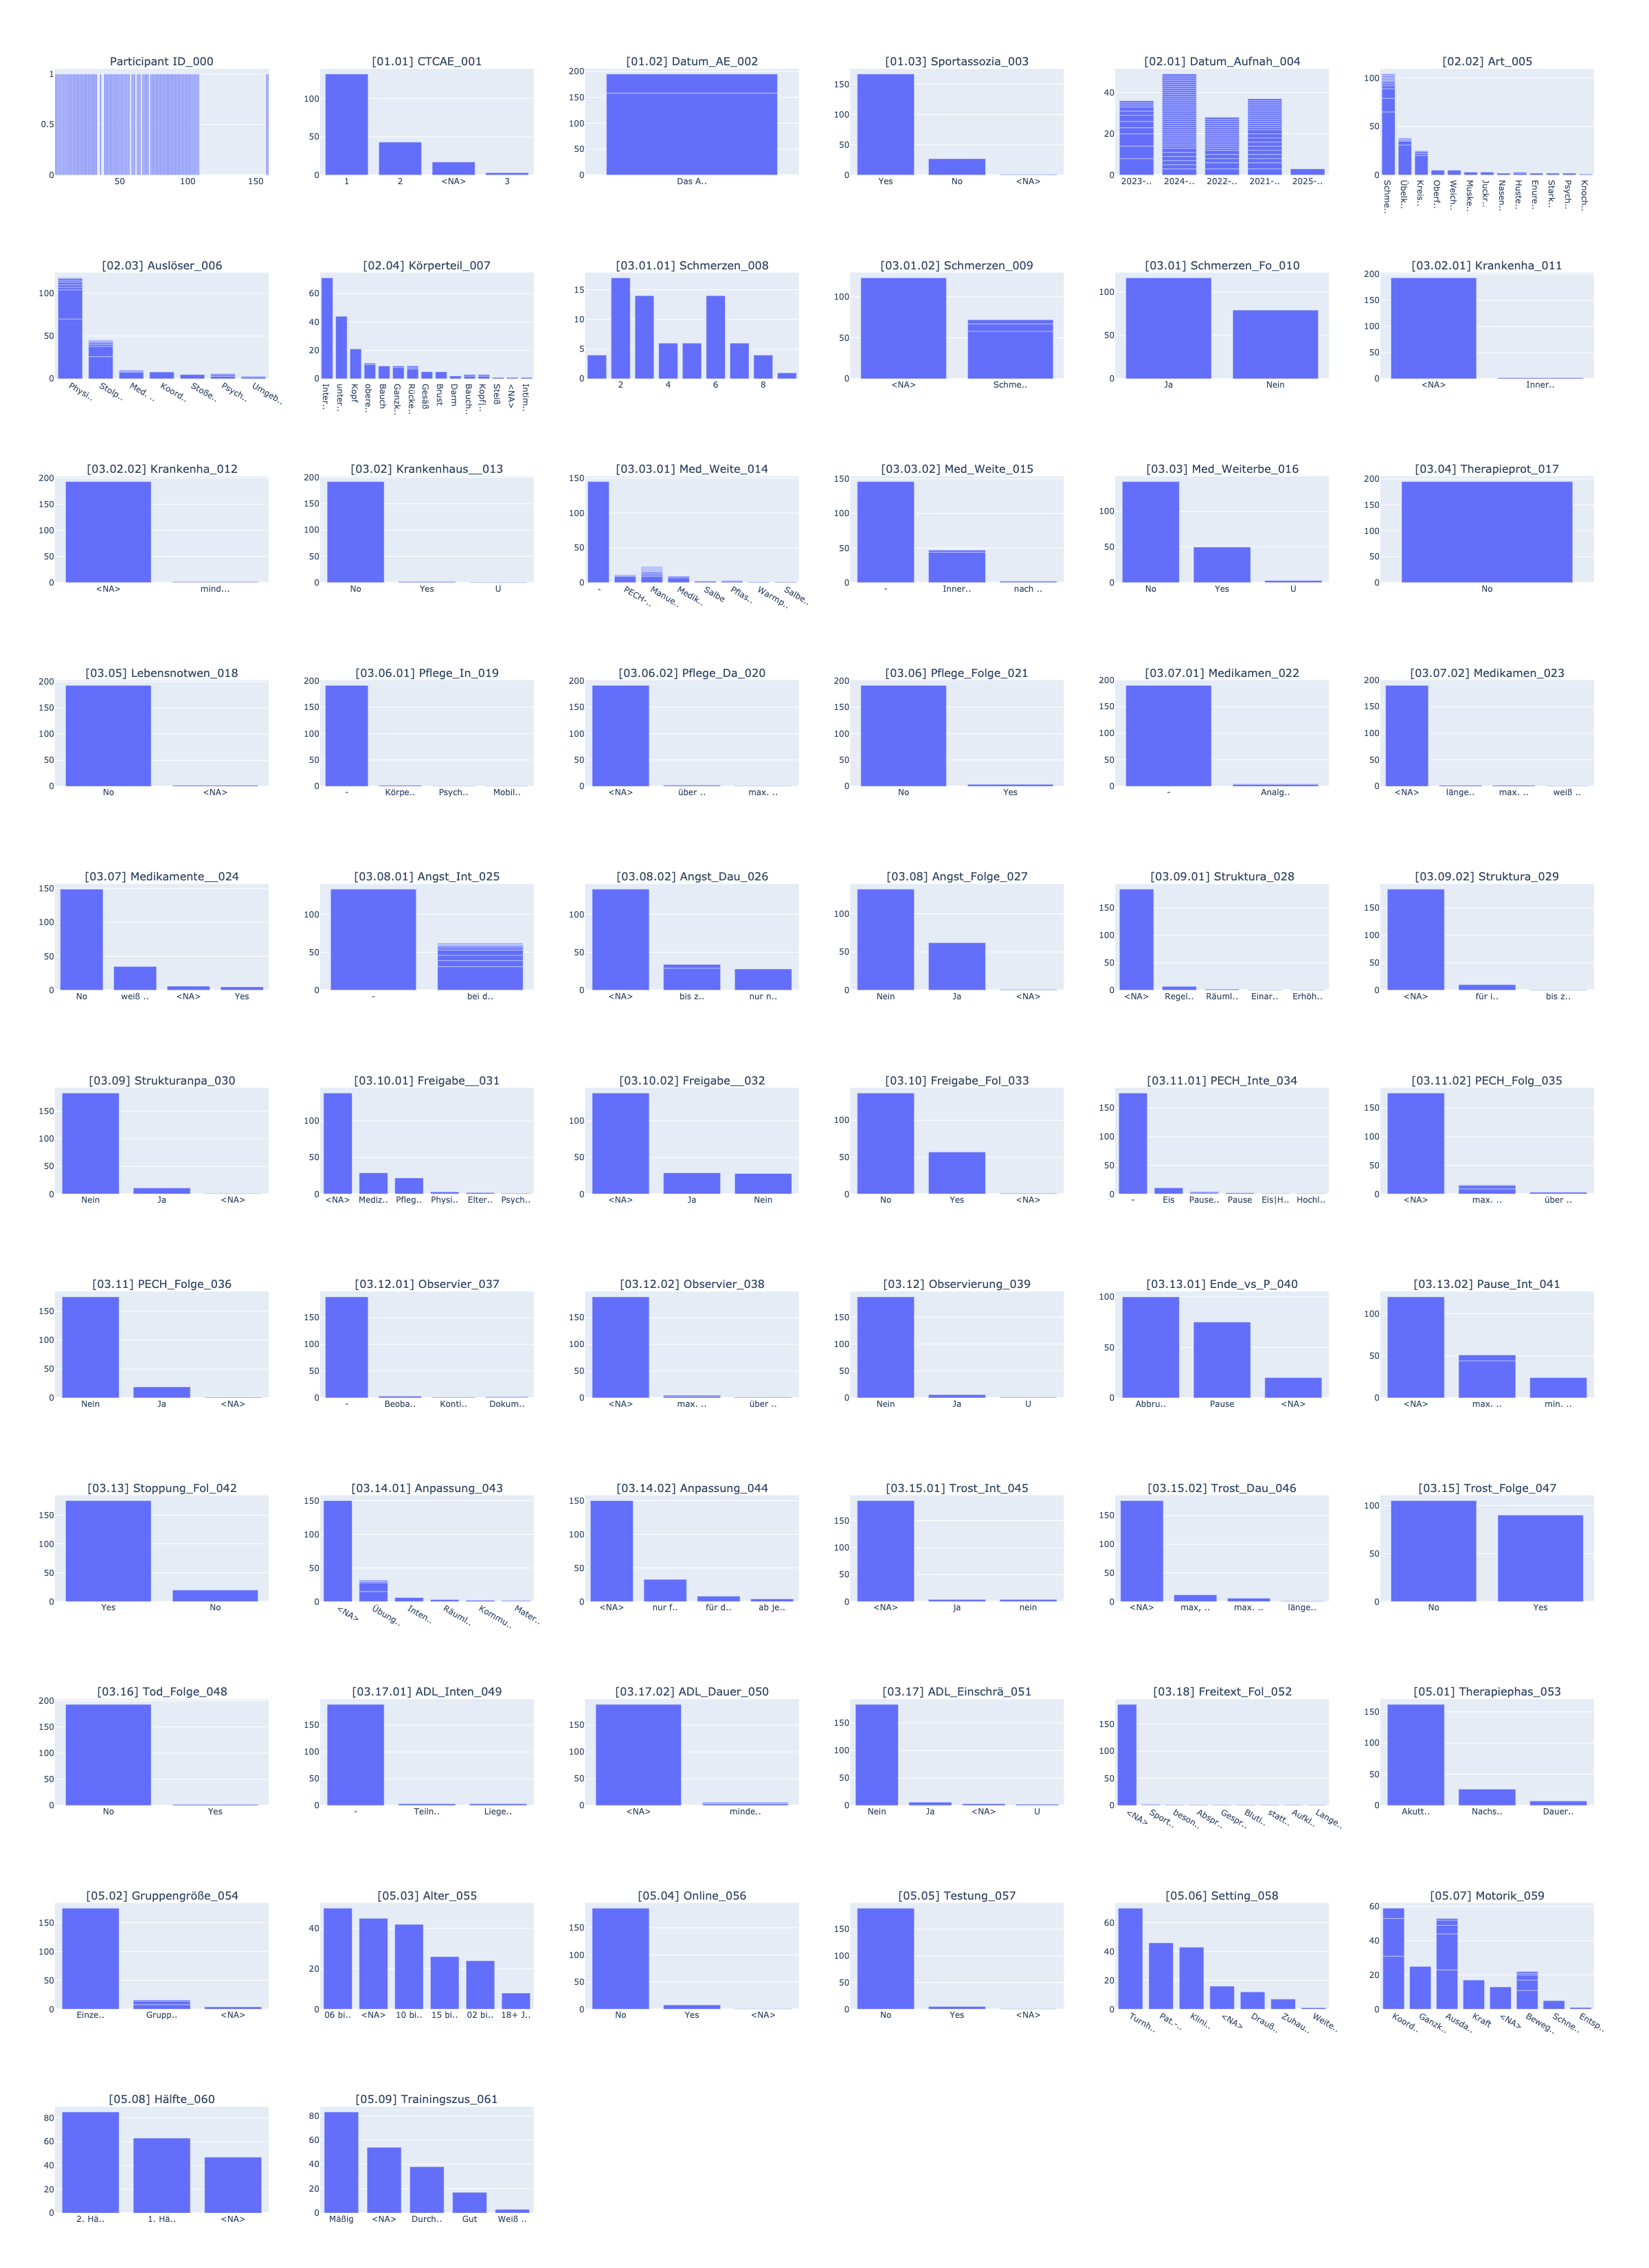

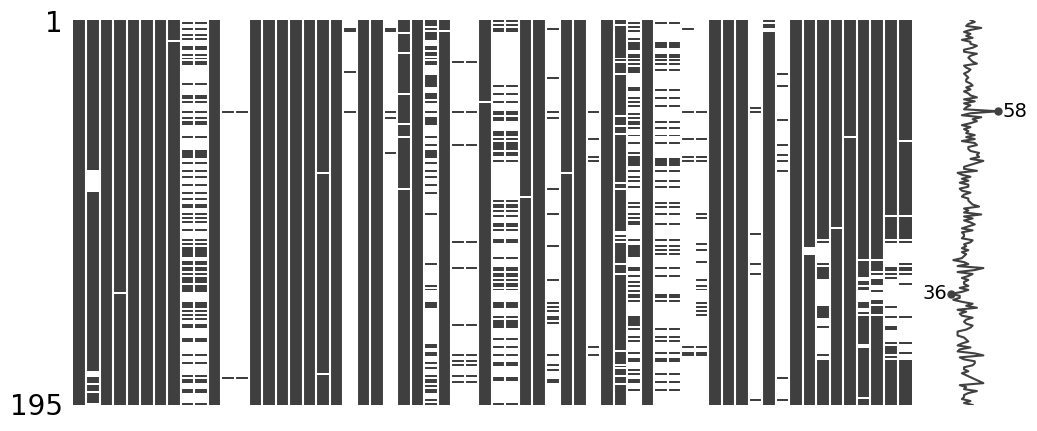

In [2]:
df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    )
)

# * CTCAE should be a string with integer values and MUST have <NA> as NA
df_csv_condensed["[01.01] CTCAE"] = (df_csv_condensed["[01.01] CTCAE"]
        .astype("Int64")
        .astype(str)
        .replace("<NA>", pd.NA)
)

# * mark columns that should be str instead of float, fuzzy
# col_int = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]"])

# df_csv_condensed = df_csv_condensed.astype({col_int[0]: "Int64"}).astype(
#     {col_int[0]: str}
# )


tbl.describe_df(
    df_csv_condensed,#.iloc[:, [13]],
    "condensed",
    top_n_uniques=5,
    top_n_chars_in_index=5,
    use_plot=True,
    top_n_chars_in_columns=20,
    use_missing=True,
    fig_cols=6,
)

## <a id='toc1_2_'></a>[🕹️ interactive](#toc0_)

In [3]:
if False:
    import pygwalker as pyg 
    
    _df = df_csv_condensed.astype(str)#.sort_index(axis=1)

    _=pyg.walk(
        dataset=_df,
        appearance=os.getenv("THEME"),
        kernel_computation=True,
    )

## <a id='toc1_3_'></a>[descriptive stats](#toc0_)

In [4]:
stubs = (
        "[01.01]",
        "[01.02]",
        "[01.03]",
        "[02.02]",
        "[02.03]",
        "[02.04]",
        "[03.02]",
        "[03.03]",
        "[03.04]",
        "[03.06]",
        "[03.07]",
        "[03.08]",
        "[03.09]",
        "[03.10]",
        "[03.10.01]",
        "[03.11]",
        "[03.11.02]",
        "[03.12]",
        "[03.13]",
        "[03.13.01]",
        "[03.13.02]",
        "[03.14]",
        "[03.14.01]",
        "[03.14.02]",
        "[03.15]",
        "[03.17]",
        "[05.01]",
        "[05.02]",
        "[05.03]",
        "[05.04]",
        "[05.05]",
        "[05.06]",
        "[05.07]",
        "[05.08]",
        "[05.09]",
        )
cols = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=stubs)
# cols

In [5]:
# # ! remove rows with missing CTCAE
df_csv_condensed = df_csv_condensed[df_csv_condensed['[01.01] CTCAE'].notna()]

In [6]:
# n = len(df_csv_condensed)

# for col in cols:
#     if df_csv_condensed[col].dtype.kind in ("O"):
#         df = (df_csv_condensed[col]
#             .str.split("|")
#             .explode()
#             .value_counts()
#             .to_frame()
#             .rename(columns={"count": "cnt"})
#             .assign(pct=lambda x: x["cnt"] / n)
#             .round({"pct": 2})
#         )
#         con.from_df(df.reset_index()).show()


In [7]:
# # * loop over all selected columns
import dis
from matplotlib.pylab import f


for col in cols[:]:

    # * skip CTCAE and columns that are not str
    if col != "[01.01] CTCAE" and df_csv_condensed[col].dtype.kind in ("O"):

        # * slice
        df = df_csv_condensed[[col, "[01.01] CTCAE"]].dropna().copy()
        # print(col)
        df.iloc[:,0]= df.iloc[:,0].str.strip()#.str.ljust(70, fillchar=".")

        # * split to create arrays in cells, then explode to have atomic values
        df[col] = df[col].str.split("|")
        df = df.explode(col)

        # * to pivot
        _ =(
            tbl.pivot_df(
                df=df,
                dropna=False,
                data_bar_axis="x",
                col1_width=400,
            )
            # .format(lambda x: f"{x}")
        )
        display(_)
        # display(
        #     tbl.pivot_df(
        #         df=df,
        #         dropna=False,
        #         data_bar_axis="x",
        #     )
        # )

[01.01] CTCAE,1,2,3,Total
[01.02] Datum_AE,,,,
Das AE ist neu aufgetreten.,109 (61.2%),35 (19.7%),2 (1.1%),146 (82.0%)
Das AE war vor dem Sport bereits vorhanden und hat sich verstärkt.,23 (12.9%),8 (4.5%),1 (0.6%),32 (18.0%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[01.03] Sportassoziation,,,,
No,19 (10.7%),7 (4.0%),1 (0.6%),27 (15.3%)
Yes,112 (63.3%),36 (20.3%),2 (1.1%),150 (84.7%)
Total,131 (74.0%),43 (24.3%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[02.02] Art,,,,
Enuresis,2 (0.9%),0,0,2 (0.9%)
Hustenanfall,4 (1.8%),0,0,4 (1.8%)
Juckreiz,3 (1.3%),1 (0.4%),0,4 (1.8%)
Knochenverletzungen,0,0,2 (0.9%),2 (0.9%)
Kreislaufprobleme,28 (12.3%),2 (0.9%),0,30 (13.2%)
Muskelkater,4 (1.8%),2 (0.9%),0,6 (2.6%)
Muskelkrämpfe,1 (0.4%),0,0,1 (0.4%)
Nasenbluten,1 (0.4%),1 (0.4%),0,2 (0.9%)
Oberflächliche Verletzungen,7 (3.1%),8 (3.5%),0,15 (6.6%)


[01.01] CTCAE,1,2,3,Total
[02.03] Auslöser,,,,
Koordinationsprobleme,14 (4.9%),8 (2.8%),1 (0.4%),23 (8.1%)
Med. Therapie,67 (23.6%),11 (3.9%),0,78 (27.5%)
Physische Belastung,93 (32.7%),17 (6.0%),2 (0.7%),112 (39.4%)
Psychische Belastung,11 (3.9%),2 (0.7%),0,13 (4.6%)
"Stolpern, Ausrutschen, Fallen",21 (7.4%),19 (6.7%),1 (0.4%),41 (14.4%)
"Stoßen, Rempeln",7 (2.5%),2 (0.7%),0,9 (3.2%)
Umgebungsbedingungen,5 (1.8%),2 (0.7%),0,7 (2.5%)
Weitere,1 (0.4%),0,0,1 (0.4%)
Total,219 (77.1%),61 (21.5%),4 (1.4%),284 (100.0%)


[01.01] CTCAE,1,2,3,Total
[02.04] Körperteil,,,,
Bauch,7 (3.8%),4 (2.2%),0,11 (5.9%)
Brust,4 (2.2%),1 (0.5%),0,5 (2.7%)
Darm,2 (1.1%),0,0,2 (1.1%)
Ganzkörper,6 (3.2%),2 (1.1%),1 (0.5%),9 (4.8%)
Gesäß,5 (2.7%),2 (1.1%),0,7 (3.8%)
Internistisch,59 (31.7%),6 (3.2%),0,65 (34.9%)
Intimbereich,0,1 (0.5%),0,1 (0.5%)
Kopf,10 (5.4%),11 (5.9%),0,21 (11.3%)
Rücken,6 (3.2%),3 (1.6%),0,9 (4.8%)


[01.01] CTCAE,1,2,3,Total
[03.02] Krankenhaus_Folge,,,,
No,131 (73.6%),43 (24.2%),1 (0.6%),175 (98.3%)
U,0,0,1 (0.6%),1 (0.6%)
Yes,1 (0.6%),0,1 (0.6%),2 (1.1%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.03] Med_Weiterbehandlung_Folge,,,,
No,120 (67.4%),8 (4.5%),0,128 (71.9%)
U,3 (1.7%),0,0,3 (1.7%)
Yes,9 (5.1%),35 (19.7%),3 (1.7%),47 (26.4%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.04] Therapieprotokoll_Folge,,,,
No,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.06] Pflege_Folge,,,,
No,131 (73.6%),43 (24.2%),0,174 (97.8%)
Yes,1 (0.6%),0,3 (1.7%),4 (2.2%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.07] Medikamente_Folge,,,,
No,111 (64.2%),25 (14.5%),0,136 (78.6%)
Yes,0,2 (1.2%),3 (1.7%),5 (2.9%)
weiß nicht,20 (11.6%),12 (6.9%),0,32 (18.5%)
Total,131 (75.7%),39 (22.5%),3 (1.7%),173 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.08] Angst_Folge,,,,
Ja,33 (18.6%),21 (11.9%),2 (1.1%),56 (31.6%)
Nein,99 (55.9%),22 (12.4%),0,121 (68.4%)
Total,132 (74.6%),43 (24.3%),2 (1.1%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.09] Strukturanpassung_Folge,,,,
Ja,5 (2.8%),4 (2.3%),1 (0.6%),10 (5.6%)
Nein,127 (71.8%),38 (21.5%),2 (1.1%),167 (94.4%)
Total,132 (74.6%),42 (23.7%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.10.01] Freigabe_OK,,,,
Eltern,2 (3.6%),0,0,2 (3.6%)
Medizin,10 (17.9%),15 (26.8%),3 (5.4%),28 (50.0%)
Pflege,15 (26.8%),7 (12.5%),0,22 (39.3%)
Physiotherapie,1 (1.8%),2 (3.6%),0,3 (5.4%)
Psychosozialer Dienst,1 (1.8%),0,0,1 (1.8%)
Total,29 (51.8%),24 (42.9%),3 (5.4%),56 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.10] Freigabe_Folge,,,,
No,102 (57.6%),19 (10.7%),0,121 (68.4%)
Yes,29 (16.4%),24 (13.6%),3 (1.7%),56 (31.6%)
Total,131 (74.0%),43 (24.3%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.11.02] PECH_Folge,,,,
max. 24 Stunden,1 (5.6%),5 (27.8%),0,6 (33.3%)
max. 3 Stunden,1 (5.6%),7 (38.9%),0,8 (44.4%)
max. 7 Tage,0,1 (5.6%),0,1 (5.6%)
über 7 Tage,0,1 (5.6%),2 (11.1%),3 (16.7%)
Total,2 (11.1%),14 (77.8%),2 (11.1%),18 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.11] PECH_Folge,,,,
Ja,2 (1.1%),14 (7.9%),2 (1.1%),18 (10.1%)
Nein,130 (73.0%),29 (16.3%),1 (0.6%),160 (89.9%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.12] Observierung_Folge,,,,
Ja,3 (1.7%),2 (1.1%),1 (0.6%),6 (3.4%)
Nein,128 (71.9%),41 (23.0%),2 (1.1%),171 (96.1%)
U,1 (0.6%),0,0,1 (0.6%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.13.01] Ende_vs_Pause,,,,
Abbruch,68 (42.0%),22 (13.6%),2 (1.2%),92 (56.8%)
Pause,53 (32.7%),16 (9.9%),1 (0.6%),70 (43.2%)
Total,121 (74.7%),38 (23.5%),3 (1.9%),162 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.13.02] Pause_Intensität,,,,
max. 1min,5 (7.1%),0,0,5 (7.1%)
max. 5min,37 (52.9%),4 (5.7%),1 (1.4%),42 (60.0%)
min. 10min,11 (15.7%),12 (17.1%),0,23 (32.9%)
Total,53 (75.7%),16 (22.9%),1 (1.4%),70 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.13] Stoppung_Folge,,,,
No,11 (6.2%),5 (2.8%),0,16 (9.0%)
Yes,121 (68.0%),38 (21.3%),3 (1.7%),162 (91.0%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,Total
[03.14.01] Anpassung_Intensität,,,
Intensität,18 (31.0%),1 (1.7%),19 (32.8%)
Kommunikationsstrategie,3 (5.2%),1 (1.7%),4 (6.9%)
Material,2 (3.4%),2 (3.4%),4 (6.9%)
Räumlichkeit,2 (3.4%),0,2 (3.4%)
Übungsauswahl,26 (44.8%),3 (5.2%),29 (50.0%)
Total,51 (87.9%),7 (12.1%),58 (100.0%)


[01.01] CTCAE,1,2,Total
[03.14.02] Anpassung_Dauer,,,
ab jetzt für alle bewegungseinheiten mit allen Patient*innen,3 (7.3%),0,3 (7.3%)
für die gesamte Therapiephase,7 (17.1%),1 (2.4%),8 (19.5%)
nur für diese Einheit,26 (63.4%),4 (9.8%),30 (73.2%)
Total,36 (87.8%),5 (12.2%),41 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.15] Trost_Folge,,,,
No,74 (41.6%),20 (11.2%),1 (0.6%),95 (53.4%)
Yes,58 (32.6%),23 (12.9%),2 (1.1%),83 (46.6%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.17] ADL_Einschränkungen,,,,
Ja,2 (1.1%),3 (1.7%),1 (0.6%),6 (3.4%)
Nein,128 (73.1%),40 (22.9%),0,168 (96.0%)
U,1 (0.6%),0,0,1 (0.6%)
Total,131 (74.9%),43 (24.6%),1 (0.6%),175 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.01] Therapiephase,,,,
Akuttherapie,119 (66.9%),27 (15.2%),1 (0.6%),147 (82.6%)
Dauertherapie,4 (2.2%),2 (1.1%),0,6 (3.4%)
Nachsorge,9 (5.1%),14 (7.9%),2 (1.1%),25 (14.0%)
Total,132 (74.2%),43 (24.2%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.02] Gruppengröße,,,,
Einzel,126 (72.4%),32 (18.4%),2 (1.1%),160 (92.0%)
Gruppe 2 bis 5 TN,1 (0.6%),1 (0.6%),0,2 (1.1%)
Gruppe 5 bis 10 TN,1 (0.6%),4 (2.3%),1 (0.6%),6 (3.4%)
Gruppe über 10 TN,0,6 (3.4%),0,6 (3.4%)
Total,128 (73.6%),43 (24.7%),3 (1.7%),174 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.03] Alter,,,,
02 bis 5 Jahre,13 (9.8%),10 (7.5%),0,23 (17.3%)
06 bis 9 Jahre,34 (25.6%),6 (4.5%),0,40 (30.1%)
10 bis 14 Jahre,29 (21.8%),9 (6.8%),0,38 (28.6%)
15 bis 18 Jahre,17 (12.8%),6 (4.5%),1 (0.8%),24 (18.0%)
18+ Jahre,3 (2.3%),3 (2.3%),2 (1.5%),8 (6.0%)
Total,96 (72.2%),34 (25.6%),3 (2.3%),133 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.04] Online,,,,
No,126 (71.2%),41 (23.2%),3 (1.7%),170 (96.0%)
Yes,5 (2.8%),2 (1.1%),0,7 (4.0%)
Total,131 (74.0%),43 (24.3%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.05] Testung,,,,
No,128 (72.3%),42 (23.7%),3 (1.7%),173 (97.7%)
Yes,4 (2.3%),0,0,4 (2.3%)
Total,132 (74.6%),42 (23.7%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.06] Setting,,,,
Draußen,6 (3.7%),4 (2.5%),1 (0.6%),11 (6.8%)
Klinikflur,34 (21.0%),7 (4.3%),0,41 (25.3%)
Pat.-Zimmer,33 (20.4%),9 (5.6%),0,42 (25.9%)
Turnhalle / Sportraum / Kraftraum,40 (24.7%),19 (11.7%),2 (1.2%),61 (37.7%)
Zuhause,5 (3.1%),2 (1.2%),0,7 (4.3%)
Total,118 (72.8%),41 (25.3%),3 (1.9%),162 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.07] Motorik,,,,
Ausdauer,37 (16.1%),11 (4.8%),0,48 (20.9%)
Beweglichkeit,21 (9.1%),3 (1.3%),0,24 (10.4%)
Entspannung,2 (0.9%),0,0,2 (0.9%)
Ganzkörpertraining,19 (8.3%),5 (2.2%),0,24 (10.4%)
Koordination,58 (25.2%),20 (8.7%),3 (1.3%),81 (35.2%)
Kraft,27 (11.7%),13 (5.7%),1 (0.4%),41 (17.8%)
Schnelligkeit,5 (2.2%),5 (2.2%),0,10 (4.3%)
Total,169 (73.5%),57 (24.8%),4 (1.7%),230 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.08] Hälfte,,,,
1. Hälfte,50 (38.2%),6 (4.6%),2 (1.5%),58 (44.3%)
2. Hälfte,45 (34.4%),27 (20.6%),1 (0.8%),73 (55.7%)
Total,95 (72.5%),33 (25.2%),3 (2.3%),131 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.09] Trainingszustand,,,,
Durchschnittlich,25 (20.2%),11 (8.9%),0,36 (29.0%)
Gut,10 (8.1%),2 (1.6%),0,12 (9.7%)
Mäßig,53 (42.7%),17 (13.7%),3 (2.4%),73 (58.9%)
Weiß nicht,3 (2.4%),0,0,3 (2.4%)
Total,91 (73.4%),30 (24.2%),3 (2.4%),124 (100.0%)


## <a id='toc1_4_'></a>[slides](#toc0_)

In [40]:
def create_multi_chart(df_):
    df = df_.copy()
    df.iloc[:,0] = df.iloc[:,0].str.split("|")
    df.iloc[:,1] = df.iloc[:,1].str.split("|")
    df = df.explode(df.columns[0]).explode(df.columns[1])
    
    _=(df
        .plot_stacked_bars(
            swap = True,
            top_n_index = 5,
            sort_values_index=True,
            top_n_color = 5,
            sort_values_color=True,
            relative = True,
            height=800,
            # * this adds a remark to chart title. only use on small subsets
            dropna=True,
            # show_other=True,
        )
    )
    
    _ = pls.plot_stacked_bars(
        df=df_,
        swap=True,
        height=800,
        top_n_index=5,
        sort_values_index=True,
        top_n_color=5,
        sort_values_color=True,
        relative=True,
        dropna=True,
        # show_other=True,
    )
    
    return

In [41]:
# # * apply filter if needed
df_slides = (df_csv_condensed
    # [
    #     df_csv_condensed['[01.01] CTCAE'].notna()
    # ]
    .copy()
)

### slide 1

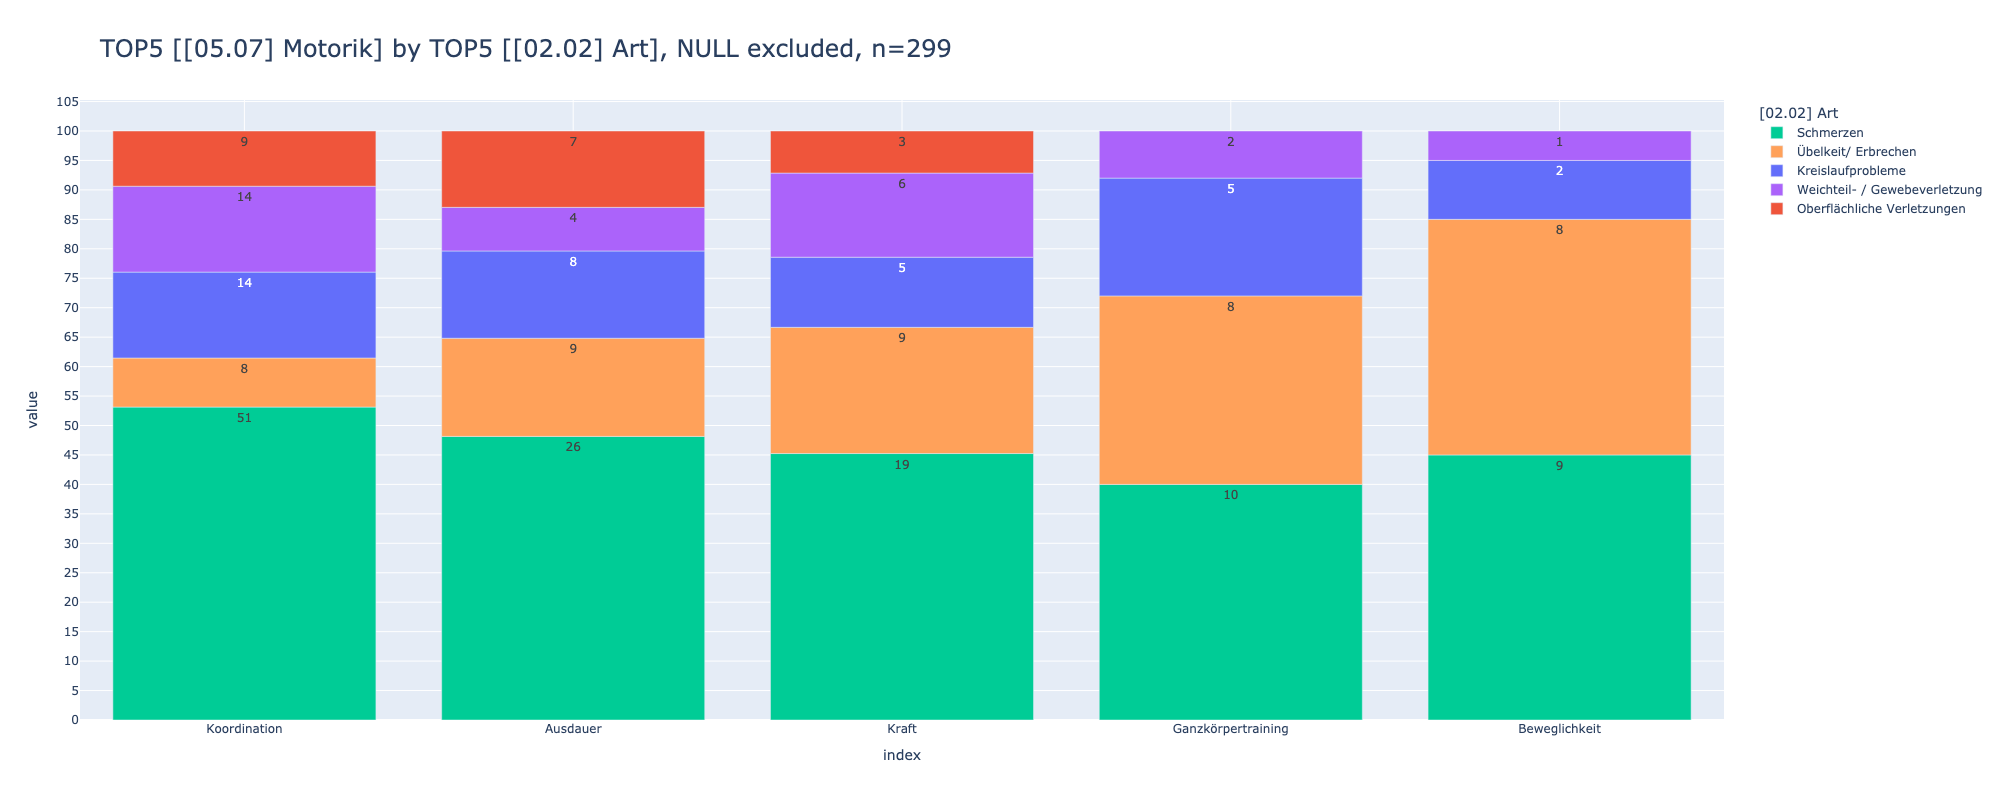

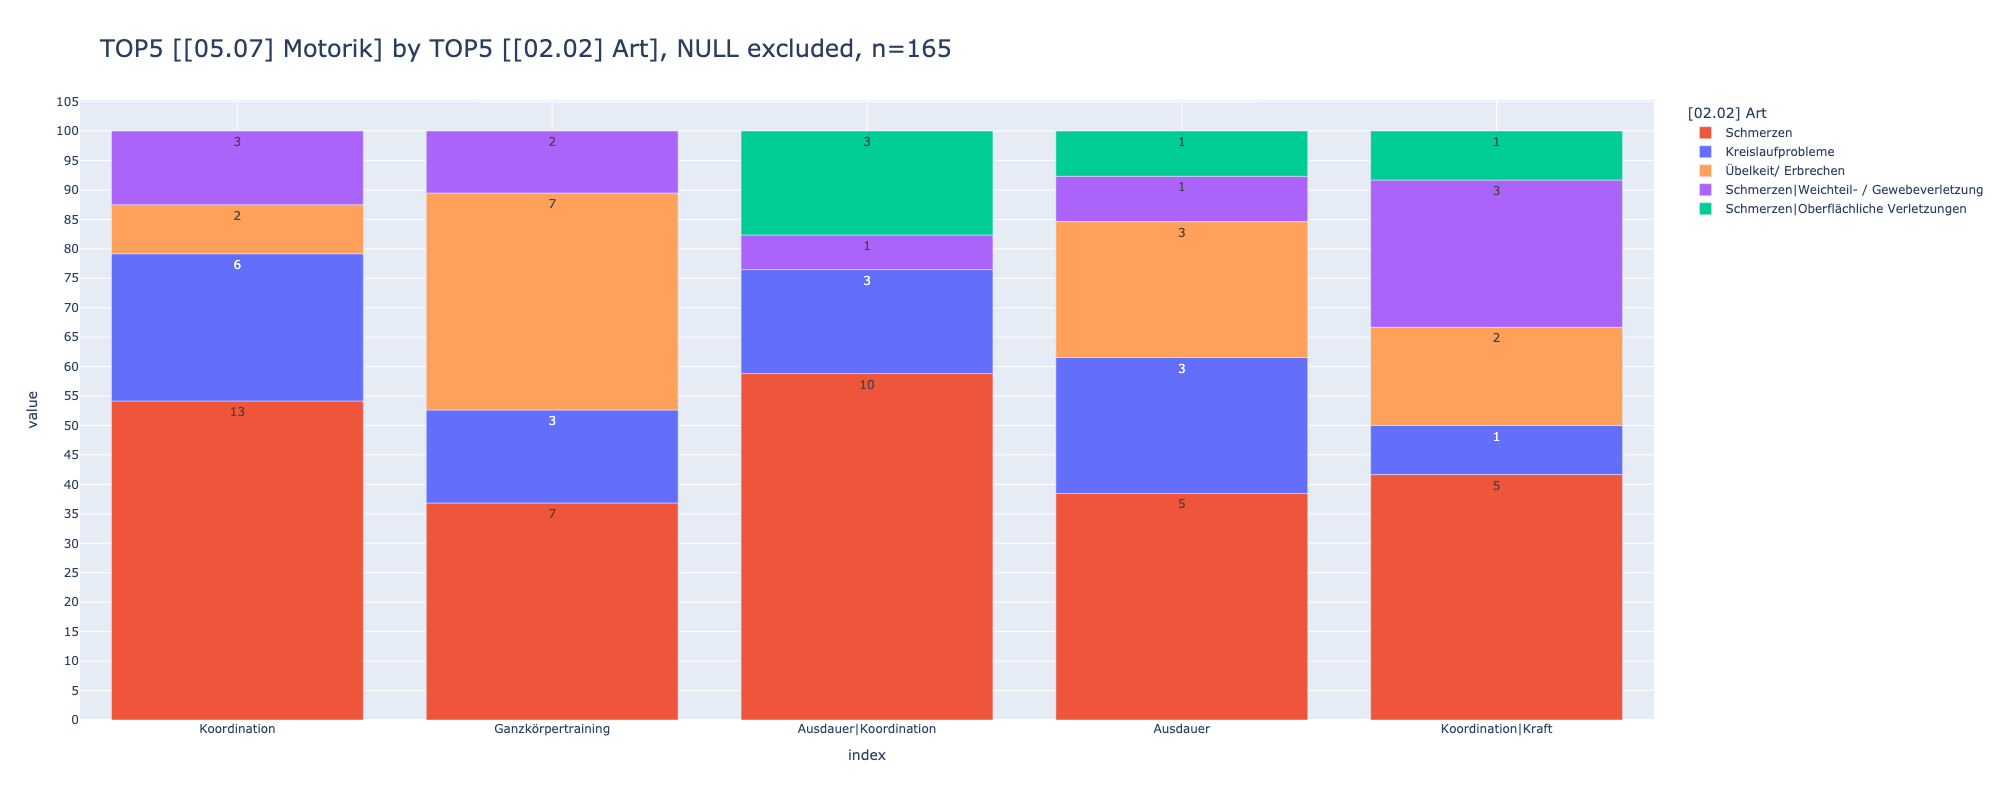

In [42]:
slide1=df_slides.find_cols(["[05.07]","[02.02]"])
create_multi_chart(df_slides[slide1])

### slide 2

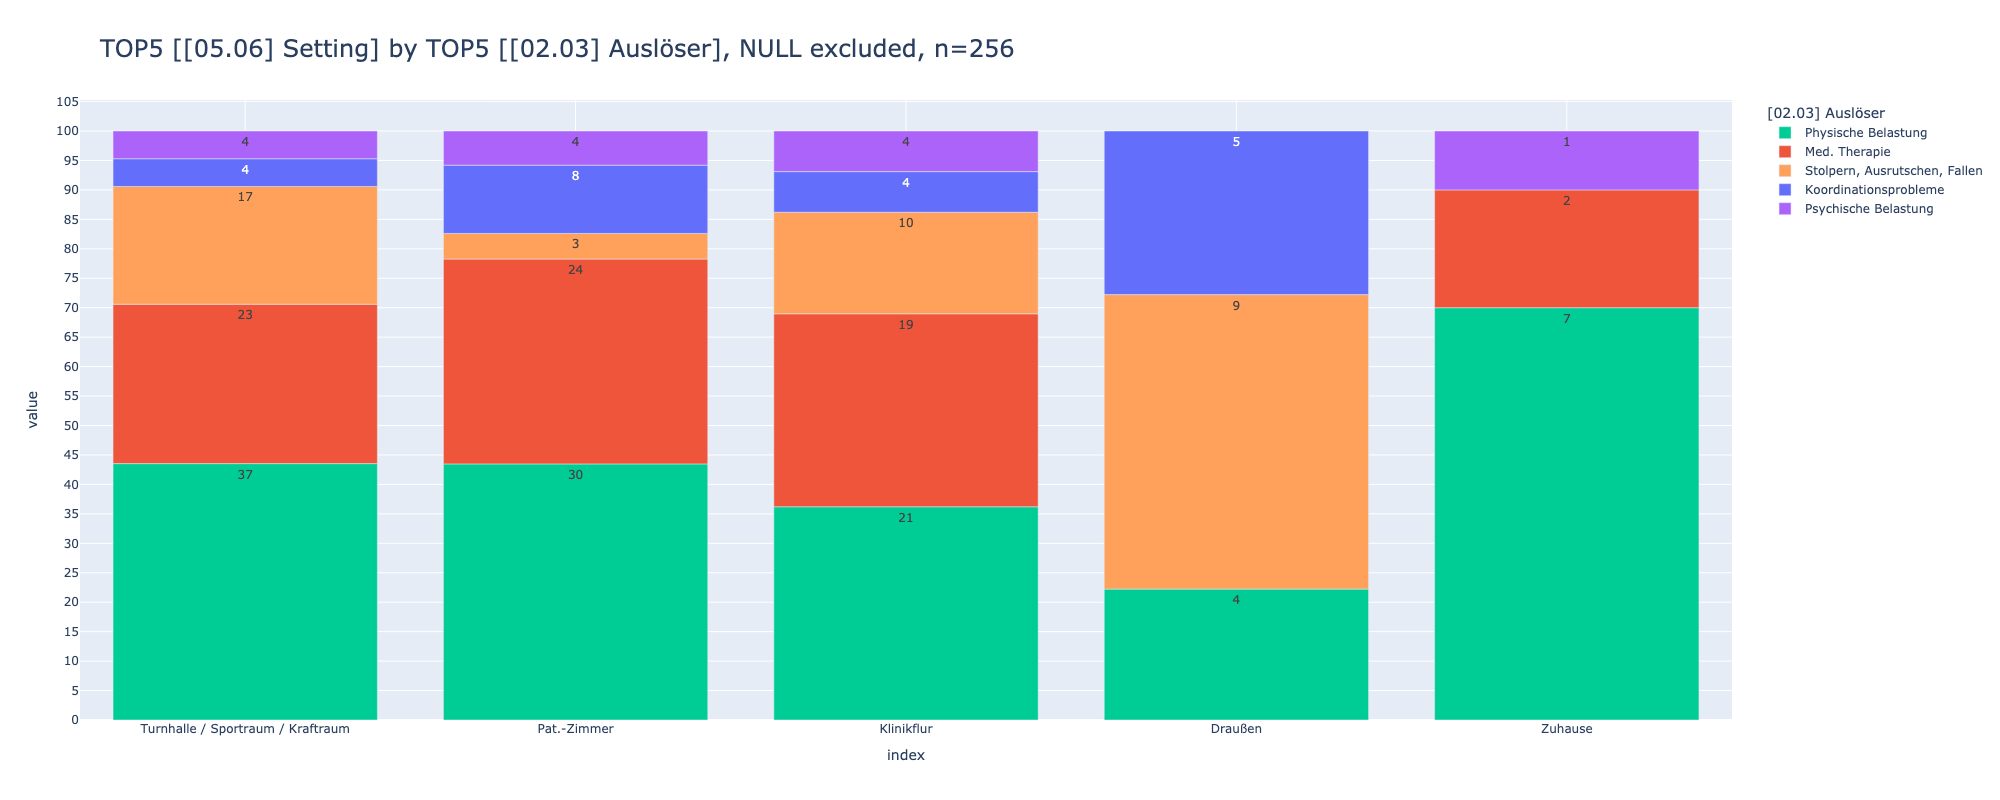

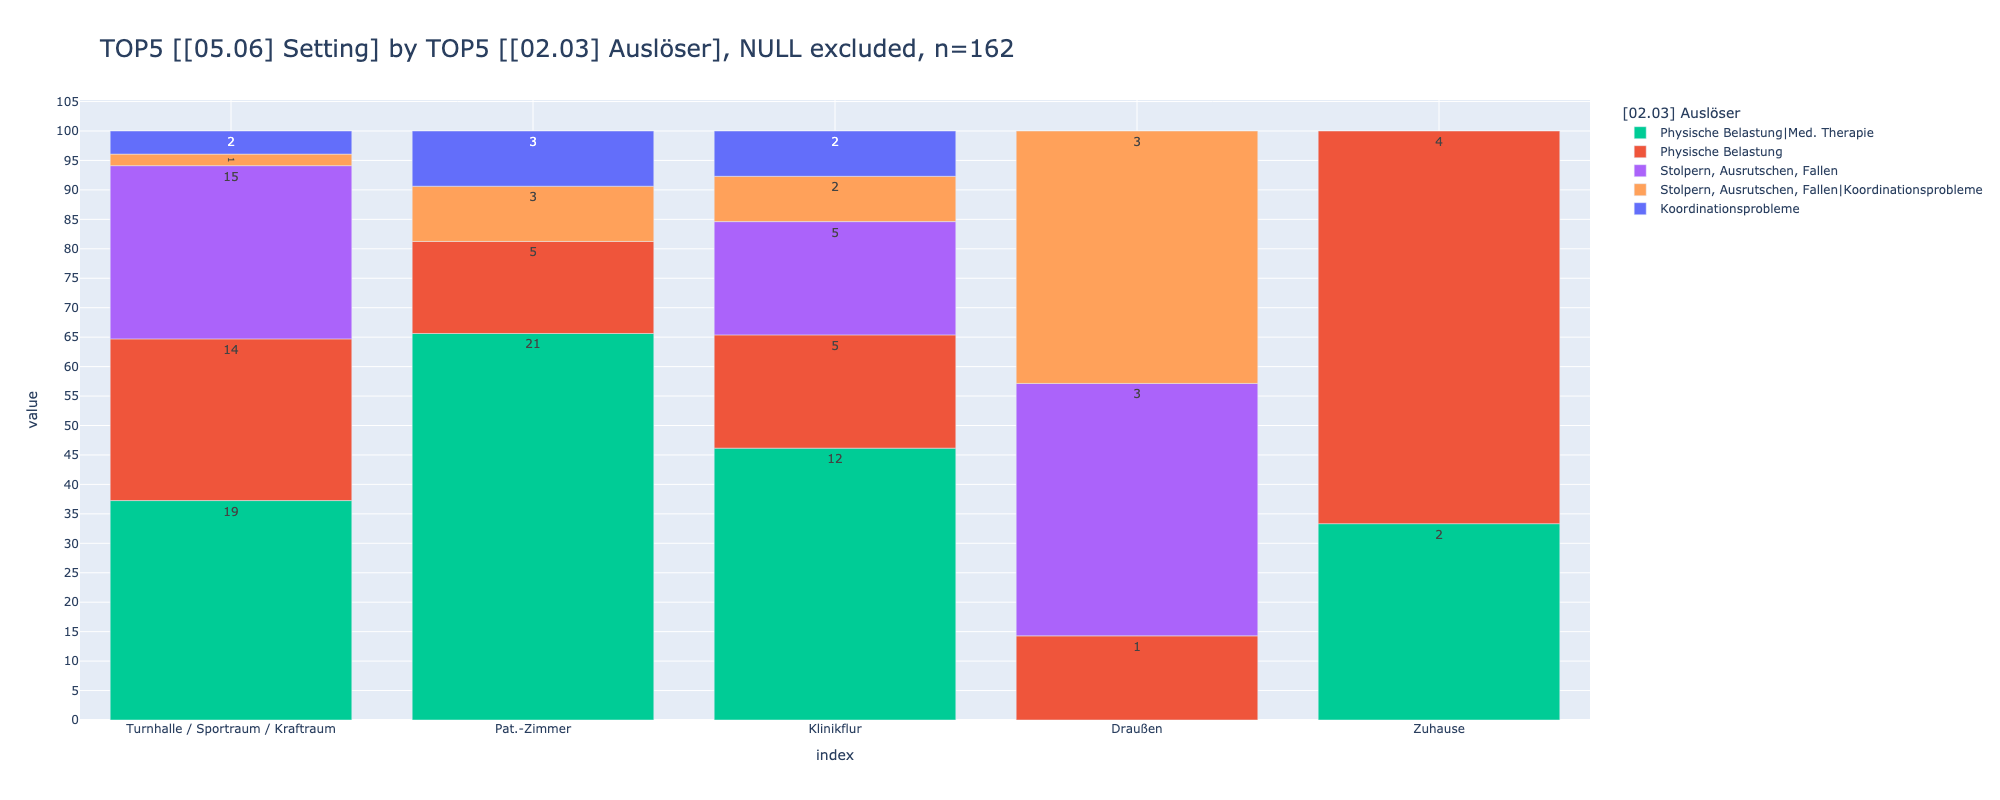

In [43]:
slide2=df_slides.find_cols(["[05.06]","[02.03]"])
create_multi_chart(df_slides[slide2])

### slide 3

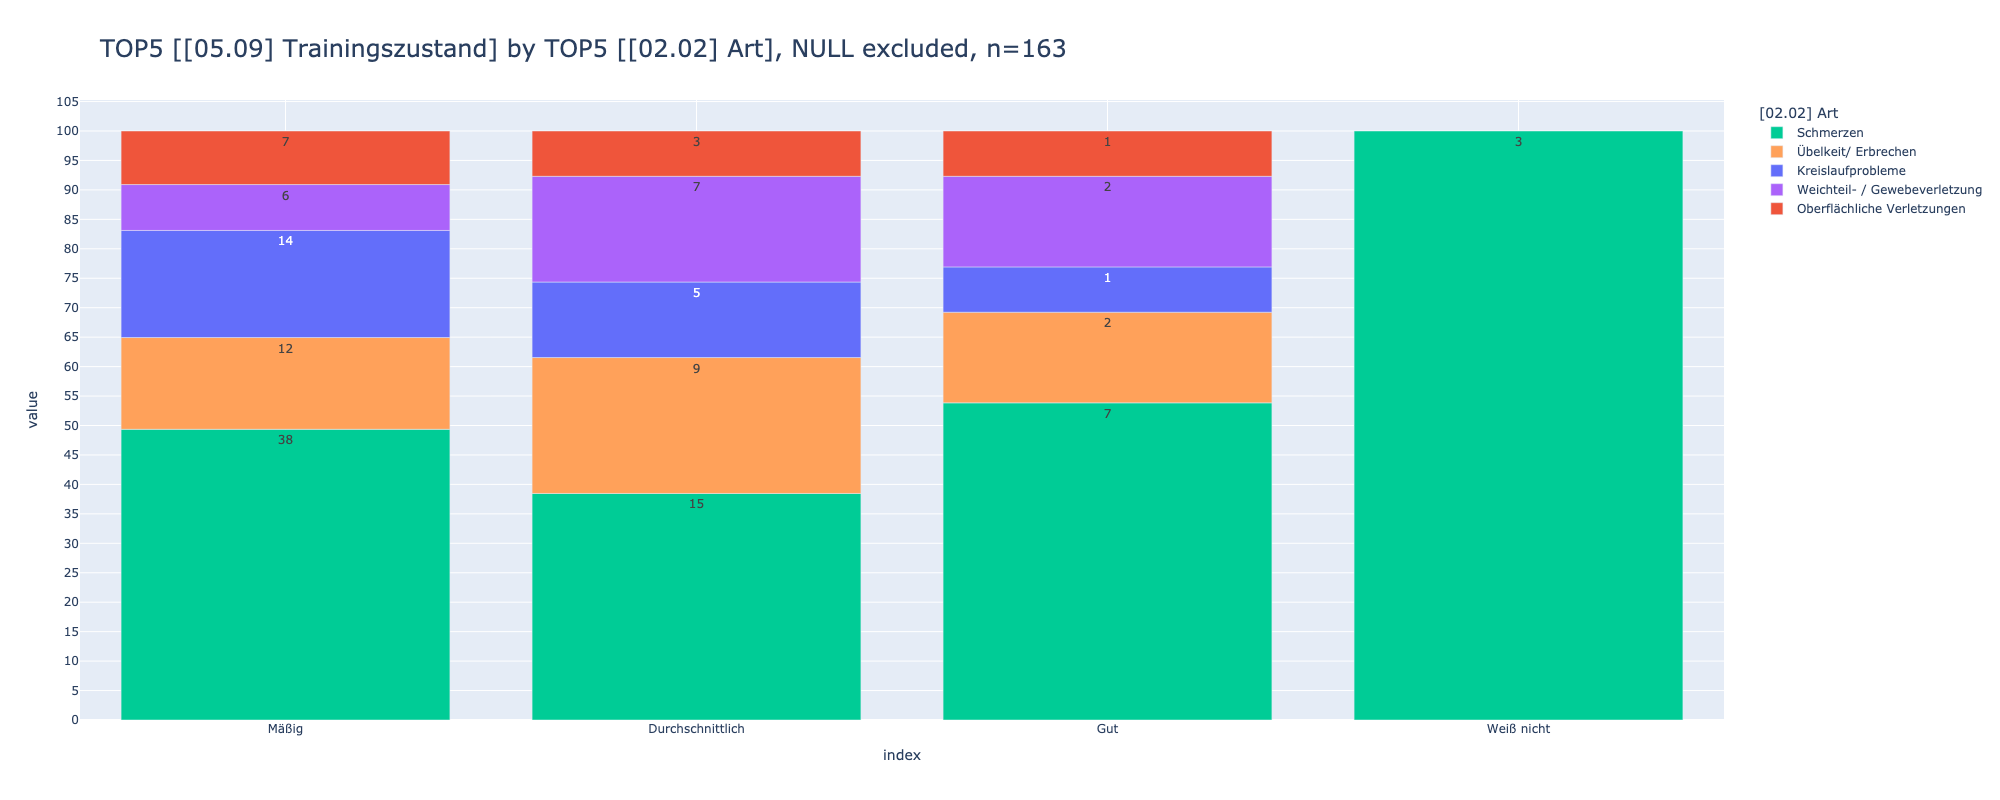

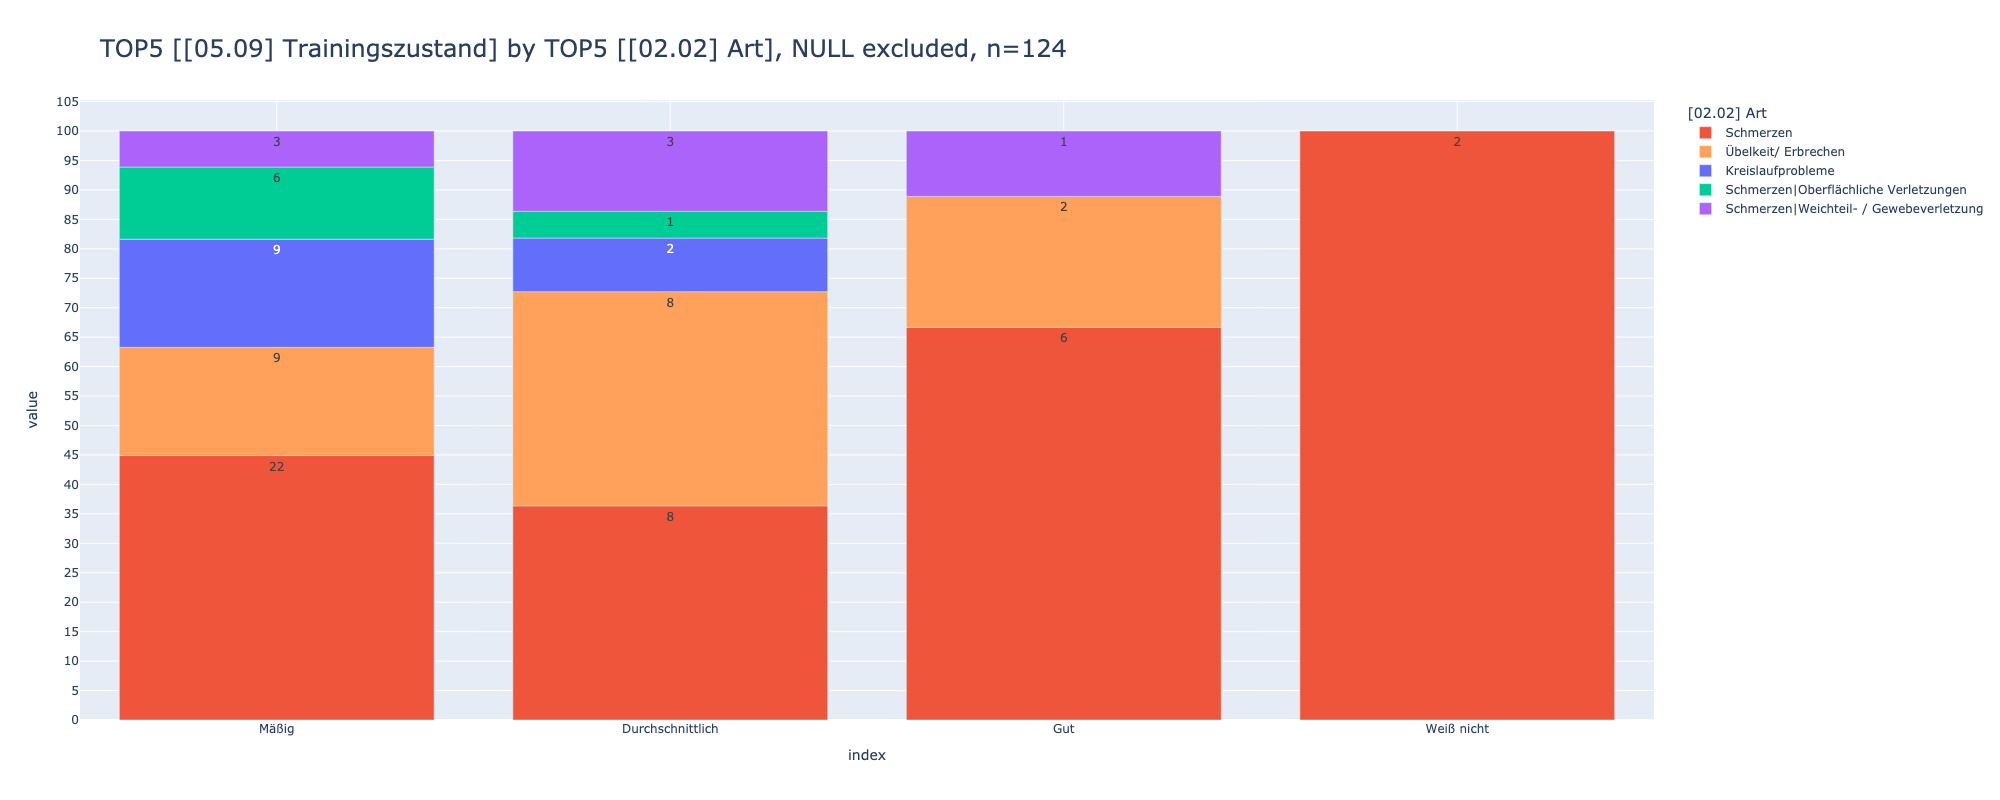

In [44]:
slide3=df_slides.find_cols(["[05.09]","[02.02]"])
create_multi_chart(df_slides[slide3])
#_df

### slide 4

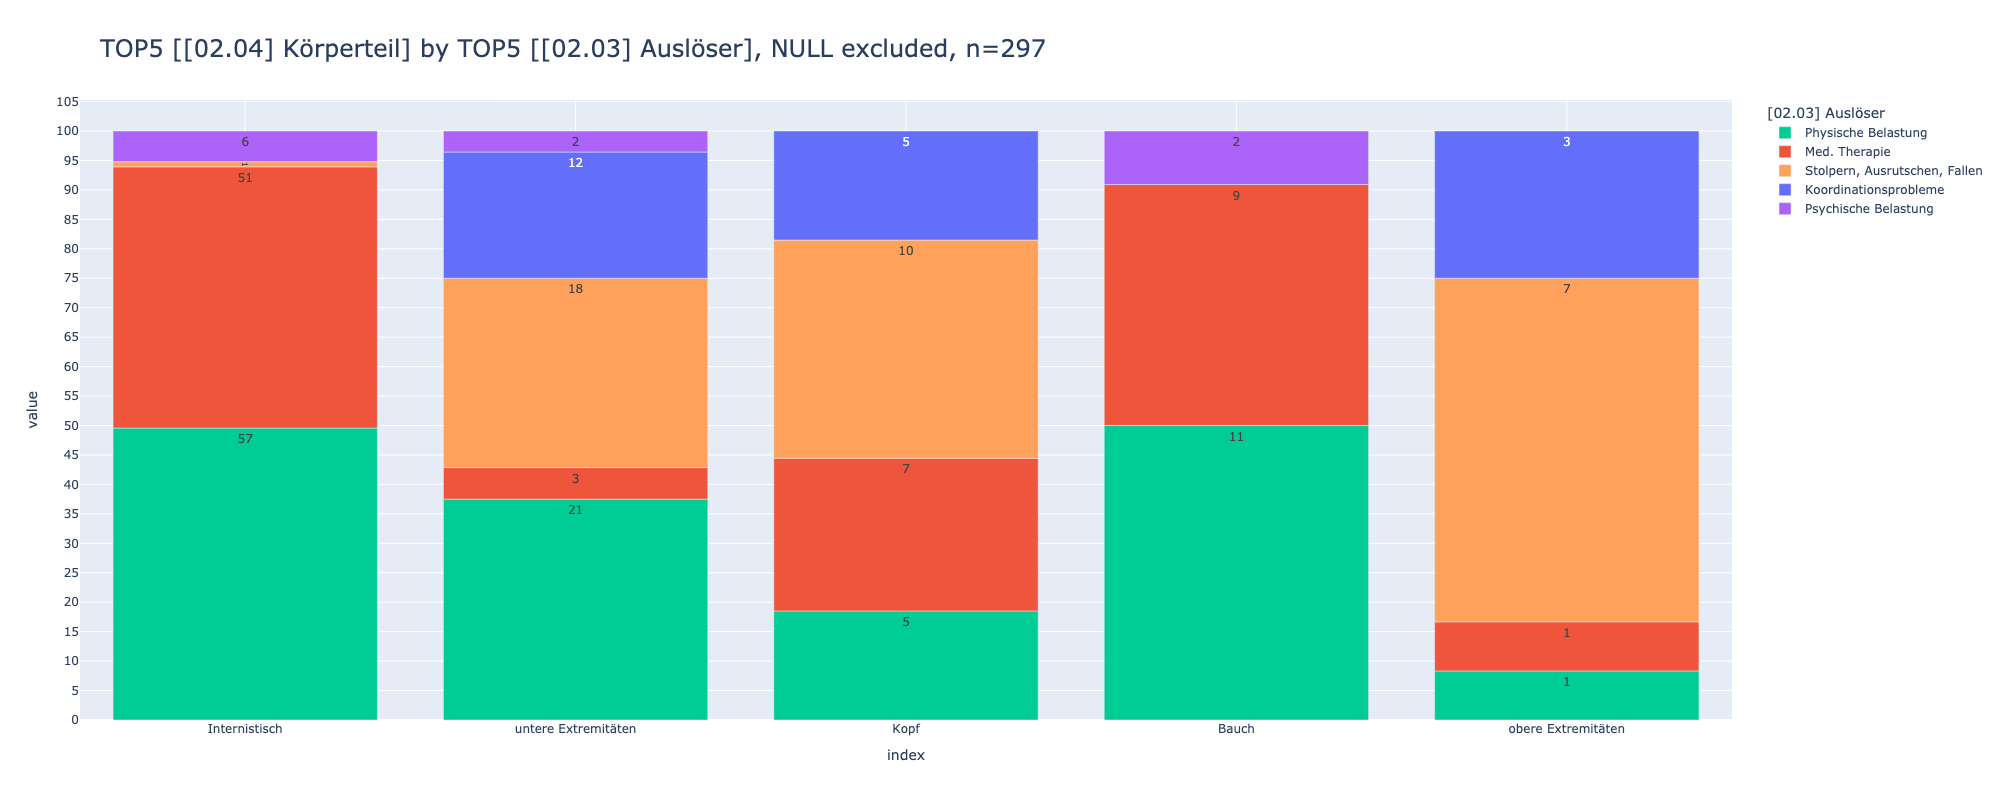

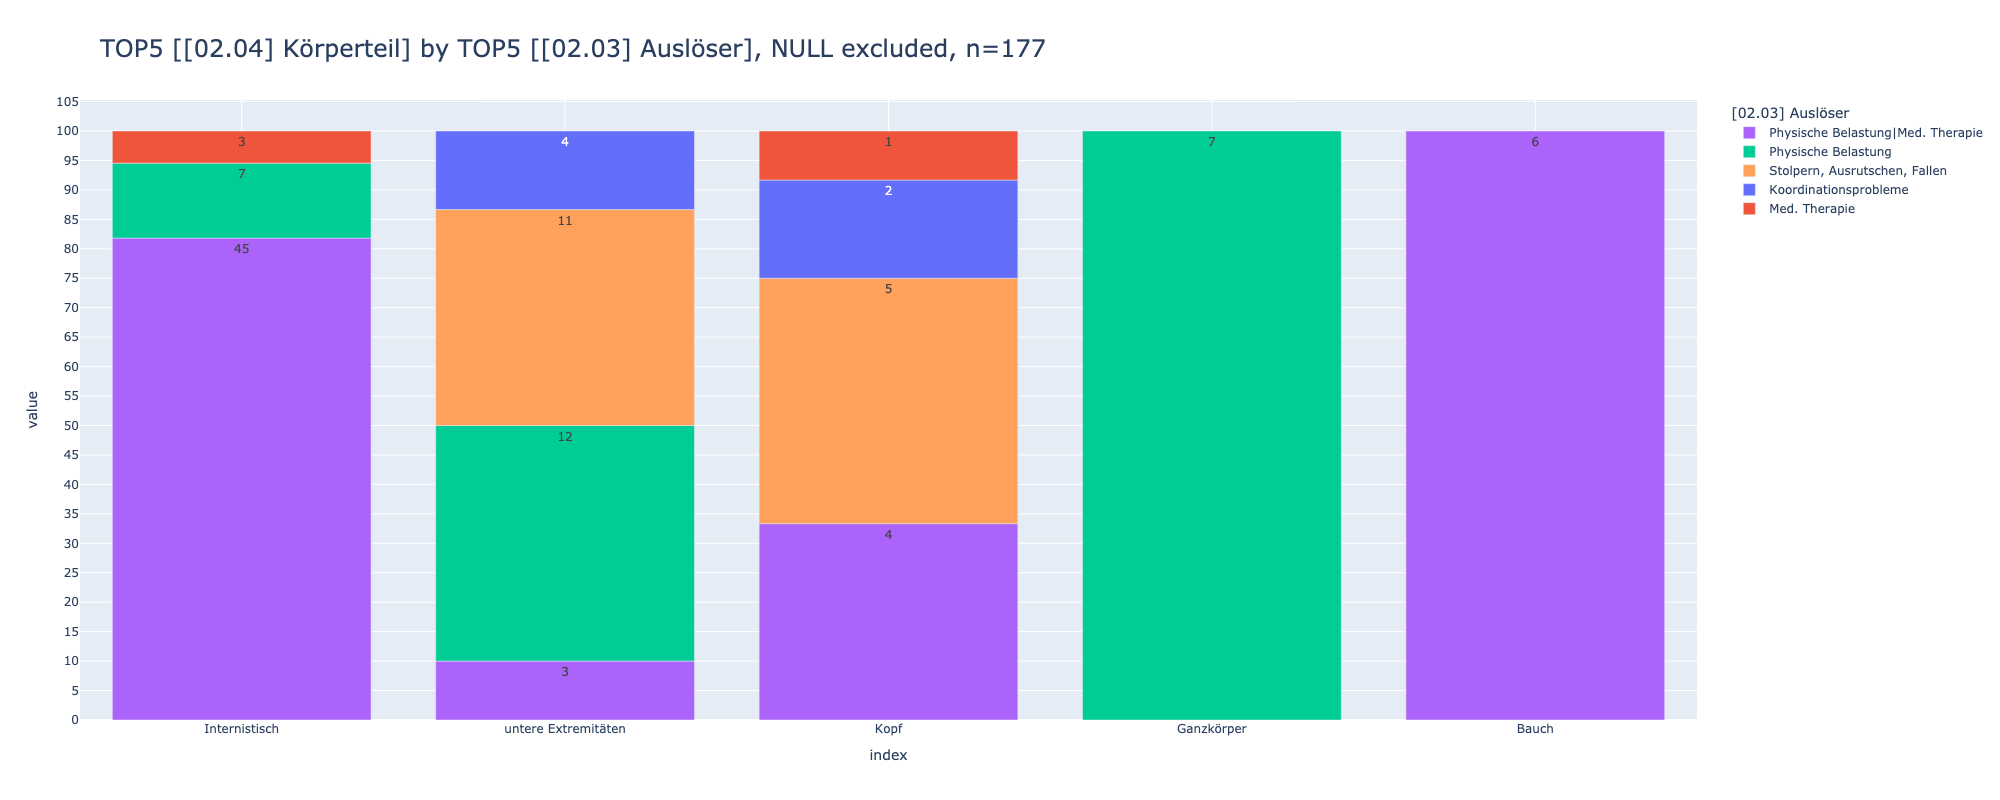

In [45]:
slide4=df_slides.find_cols(["[02.03]","[02.04]"])
create_multi_chart(df_slides[slide4])
#_df

### slide 5

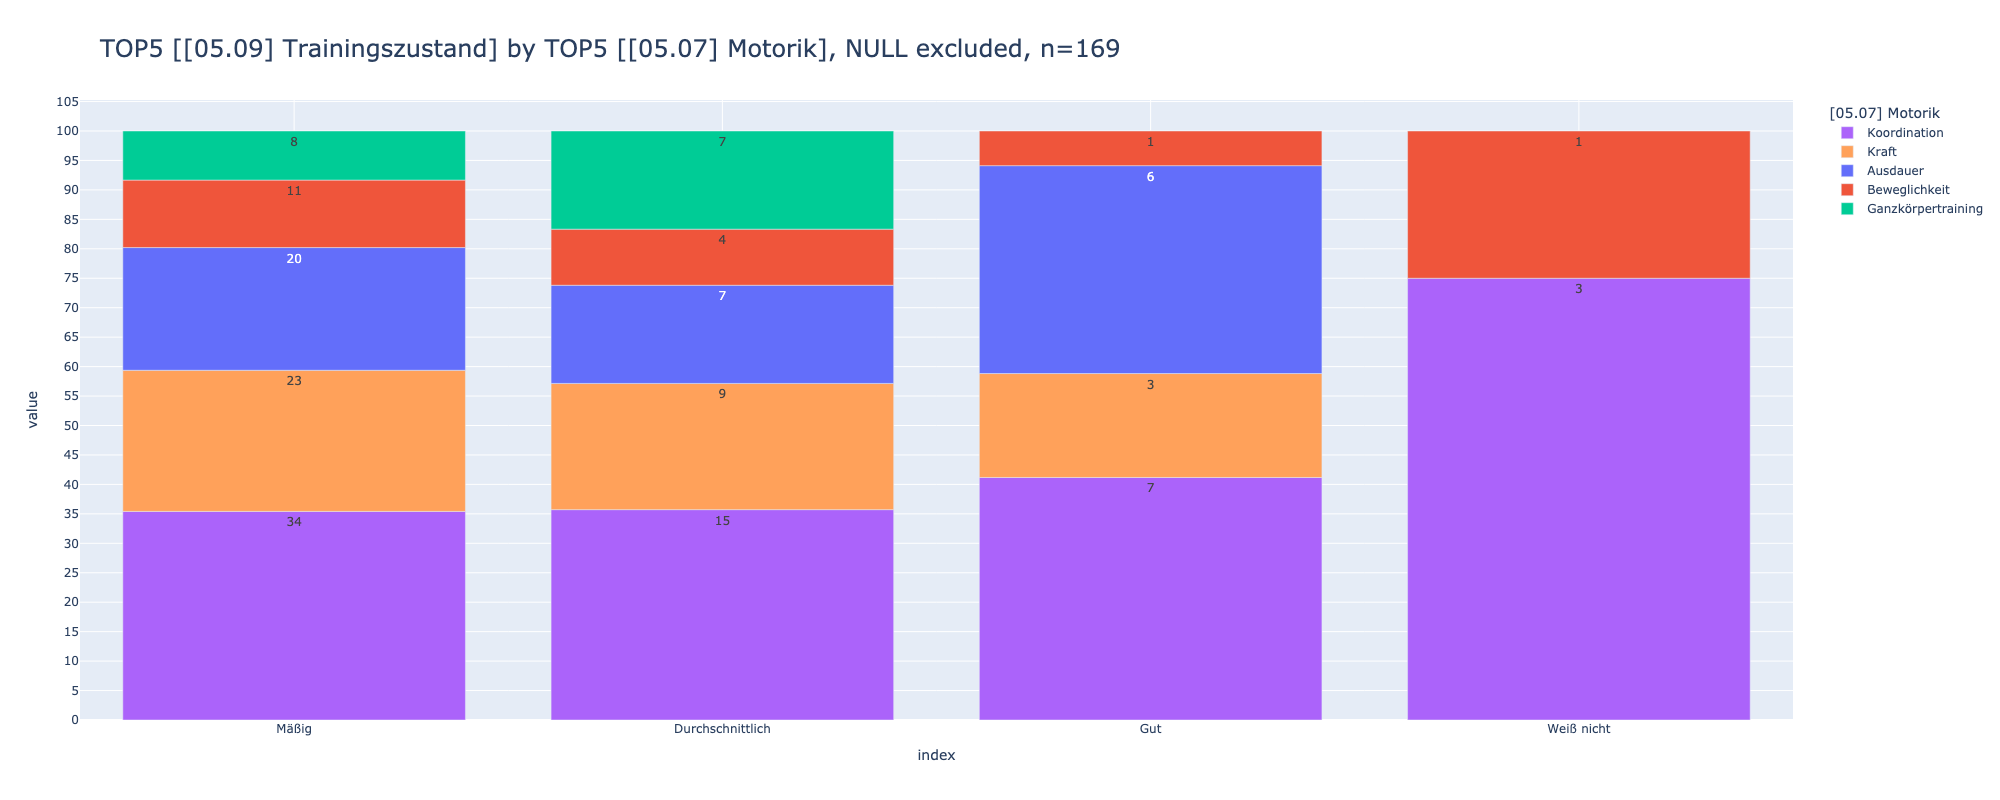

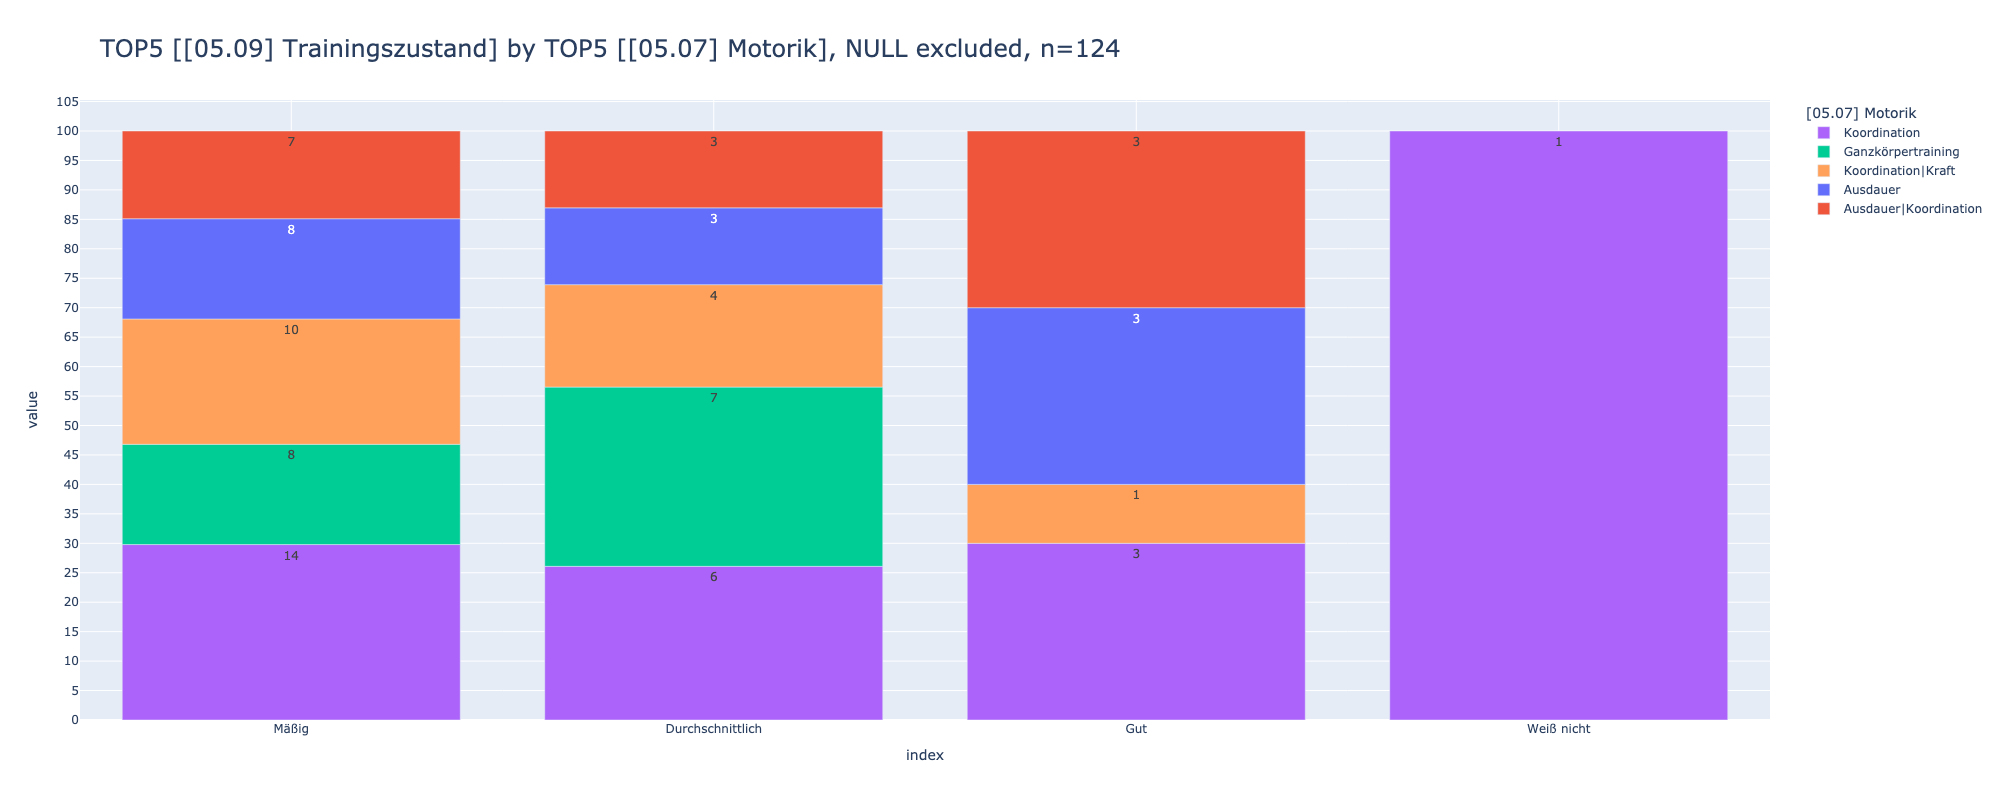

In [47]:
slide4=df_slides.find_cols(["[05.09]","[05.07]"])
create_multi_chart(df_slides[slide4])
#_df

### ⚠️ slide 6

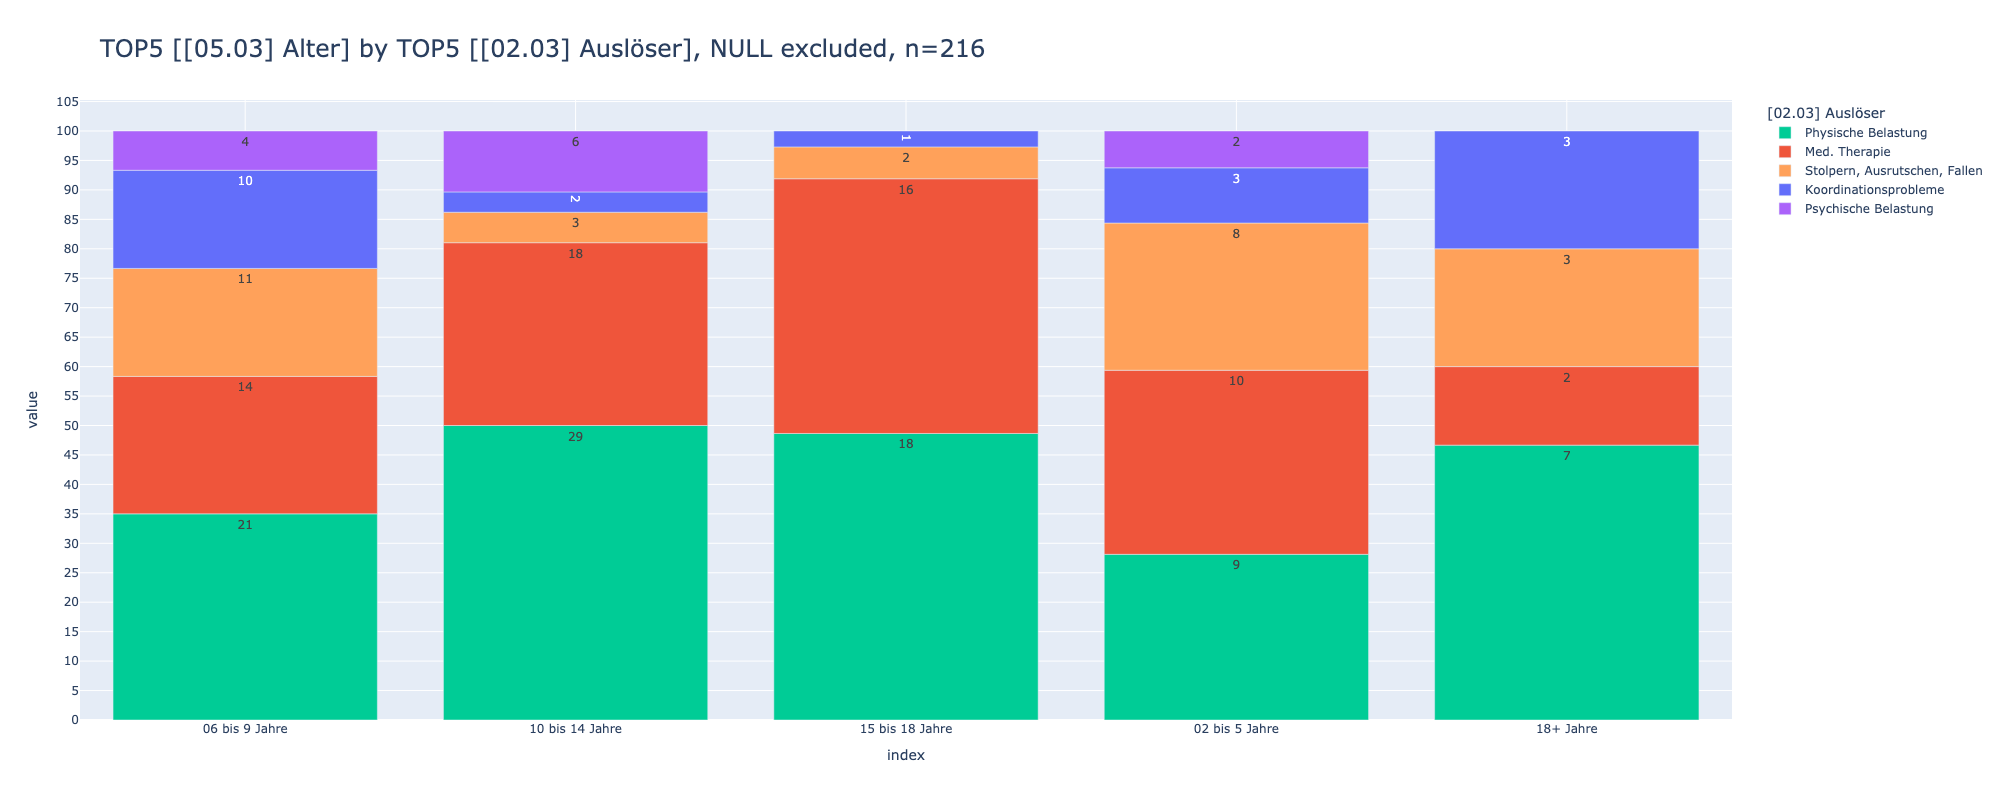

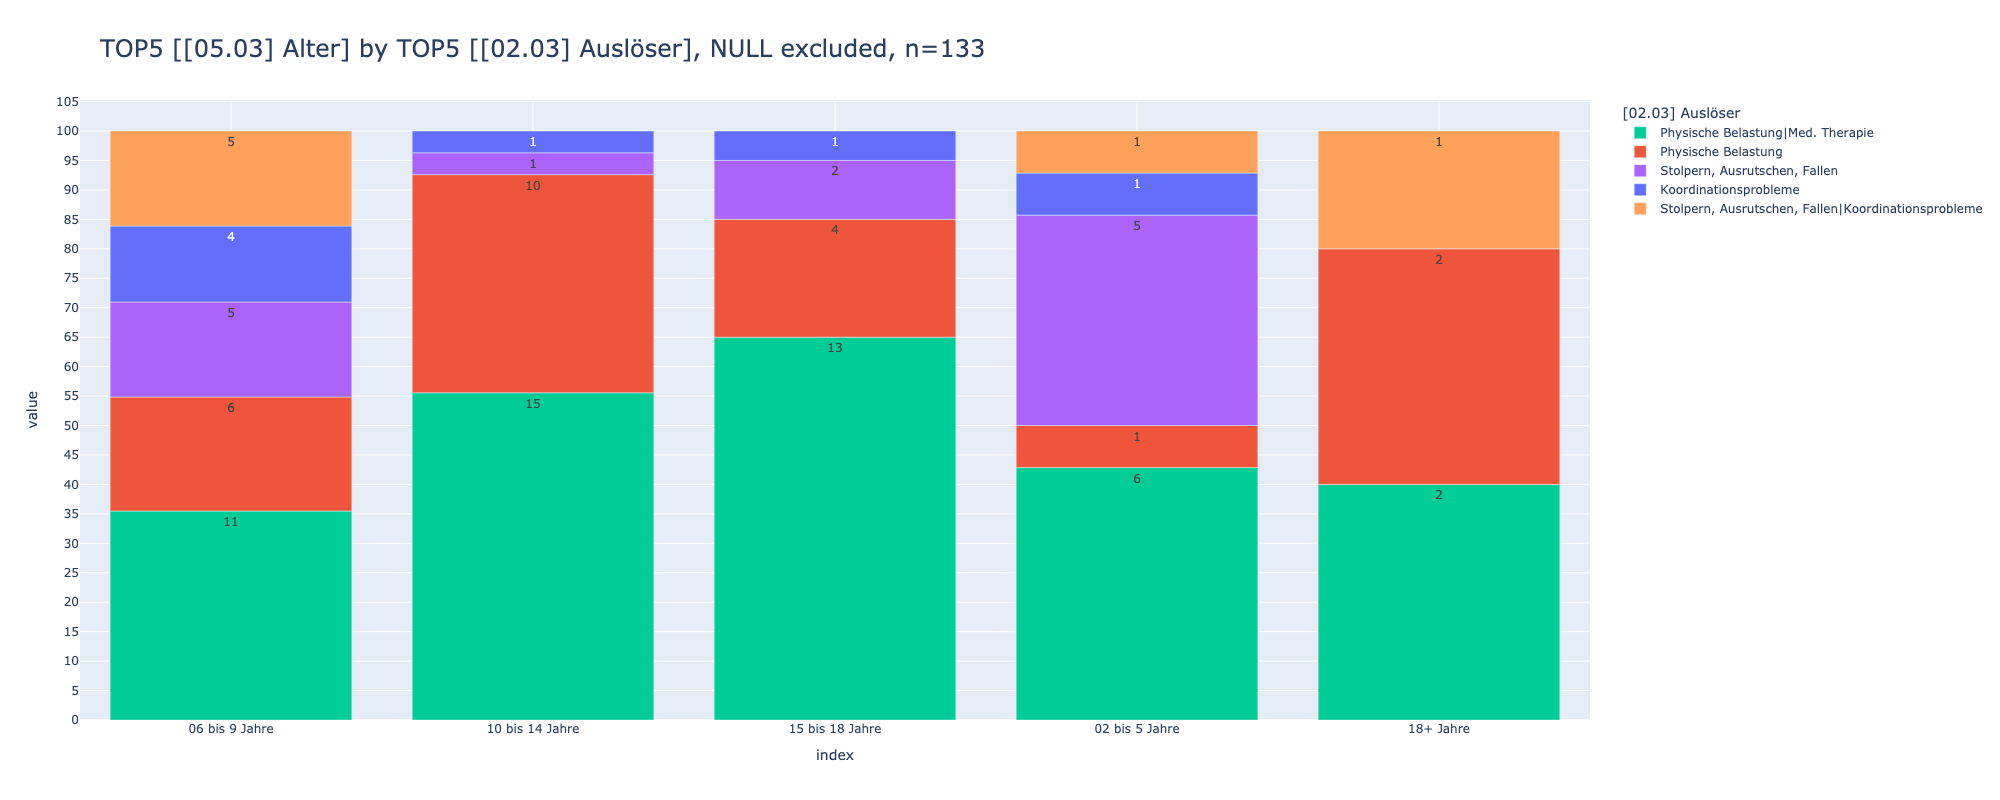

In [ ]:
# todo create new variable
slide4=df_slides.find_cols([
    "[02.03]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

### slide 7

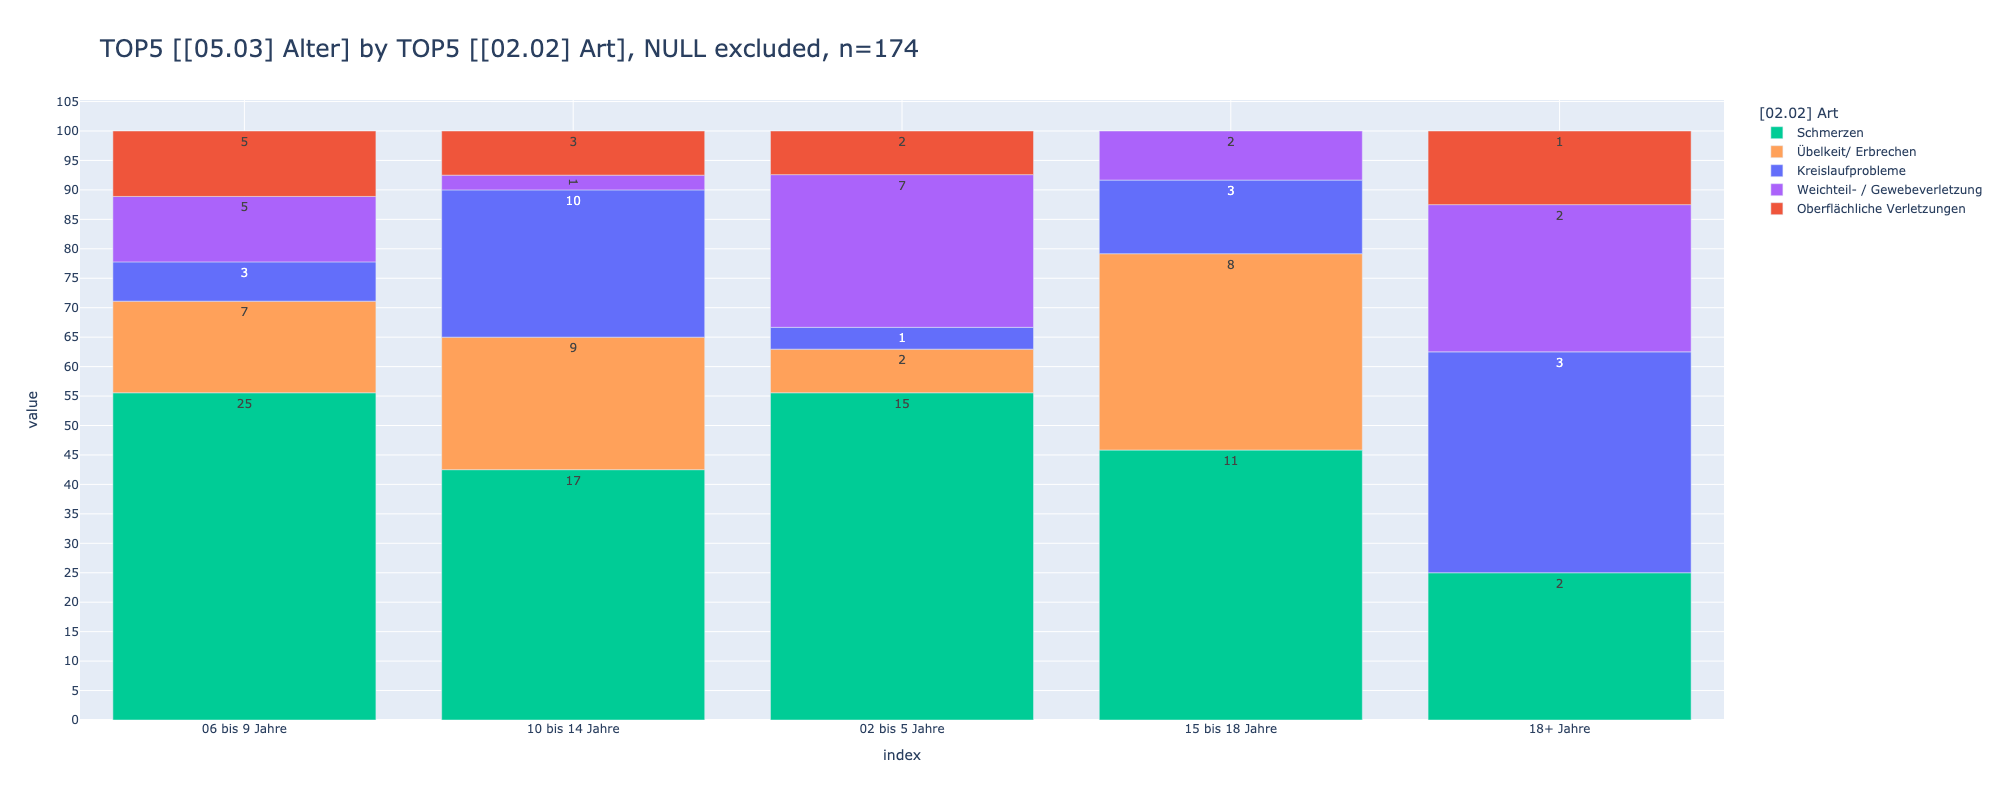

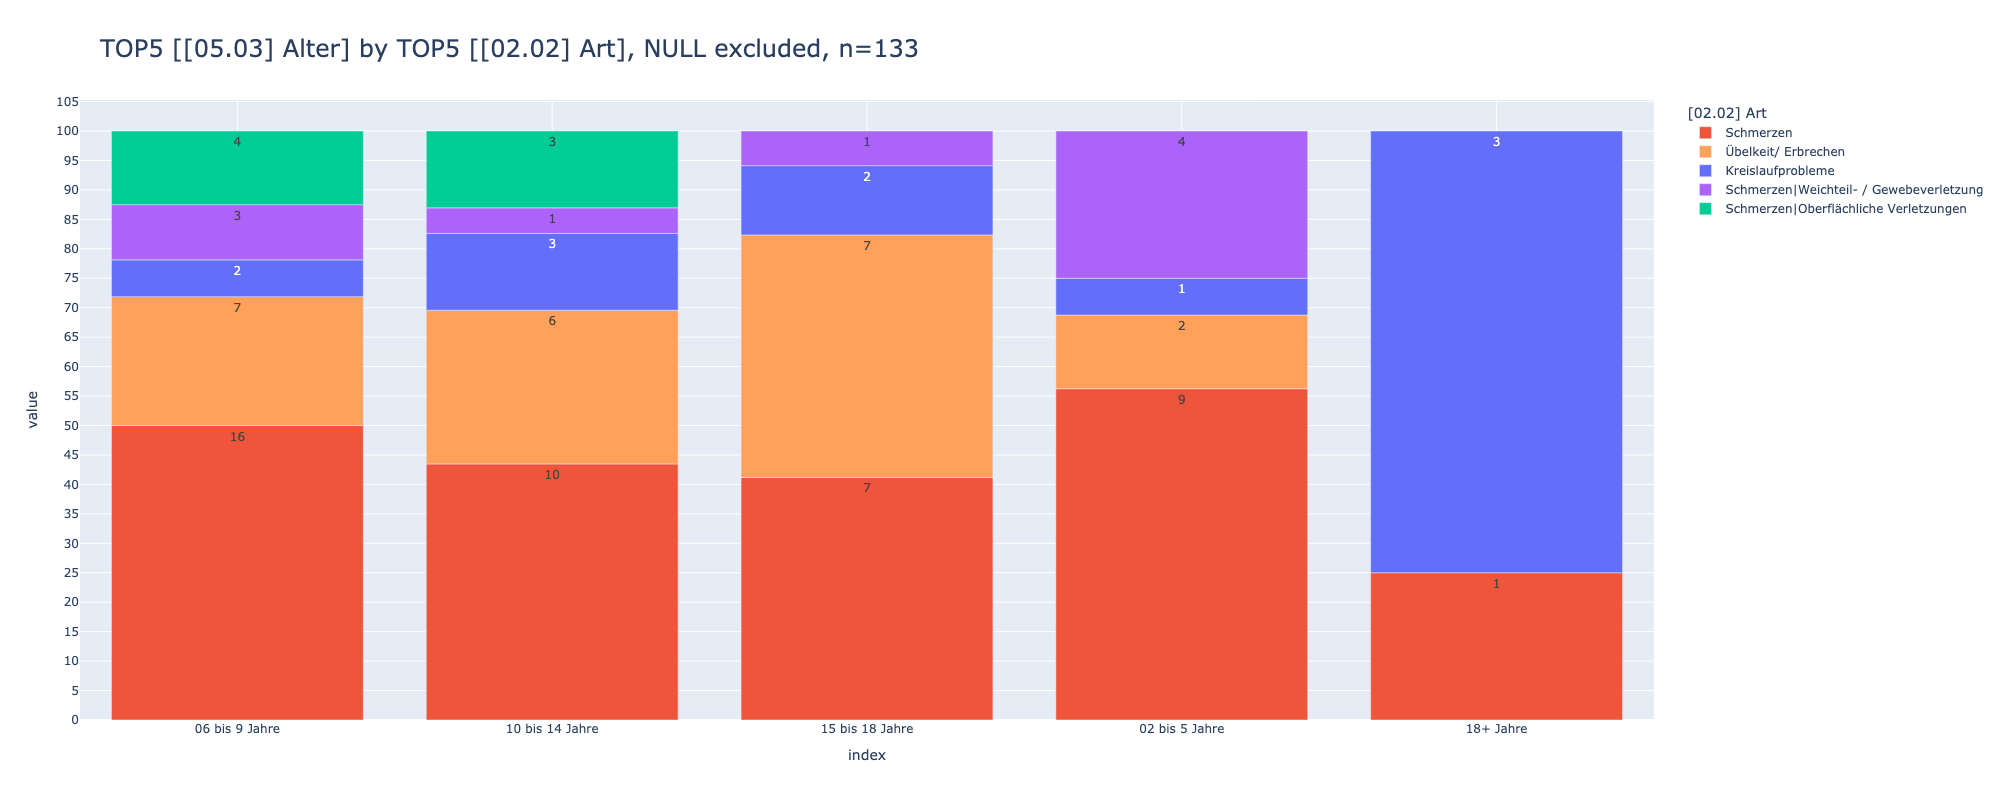

In [56]:
slide4=df_slides.find_cols([
    "[02.02]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

### slide 8

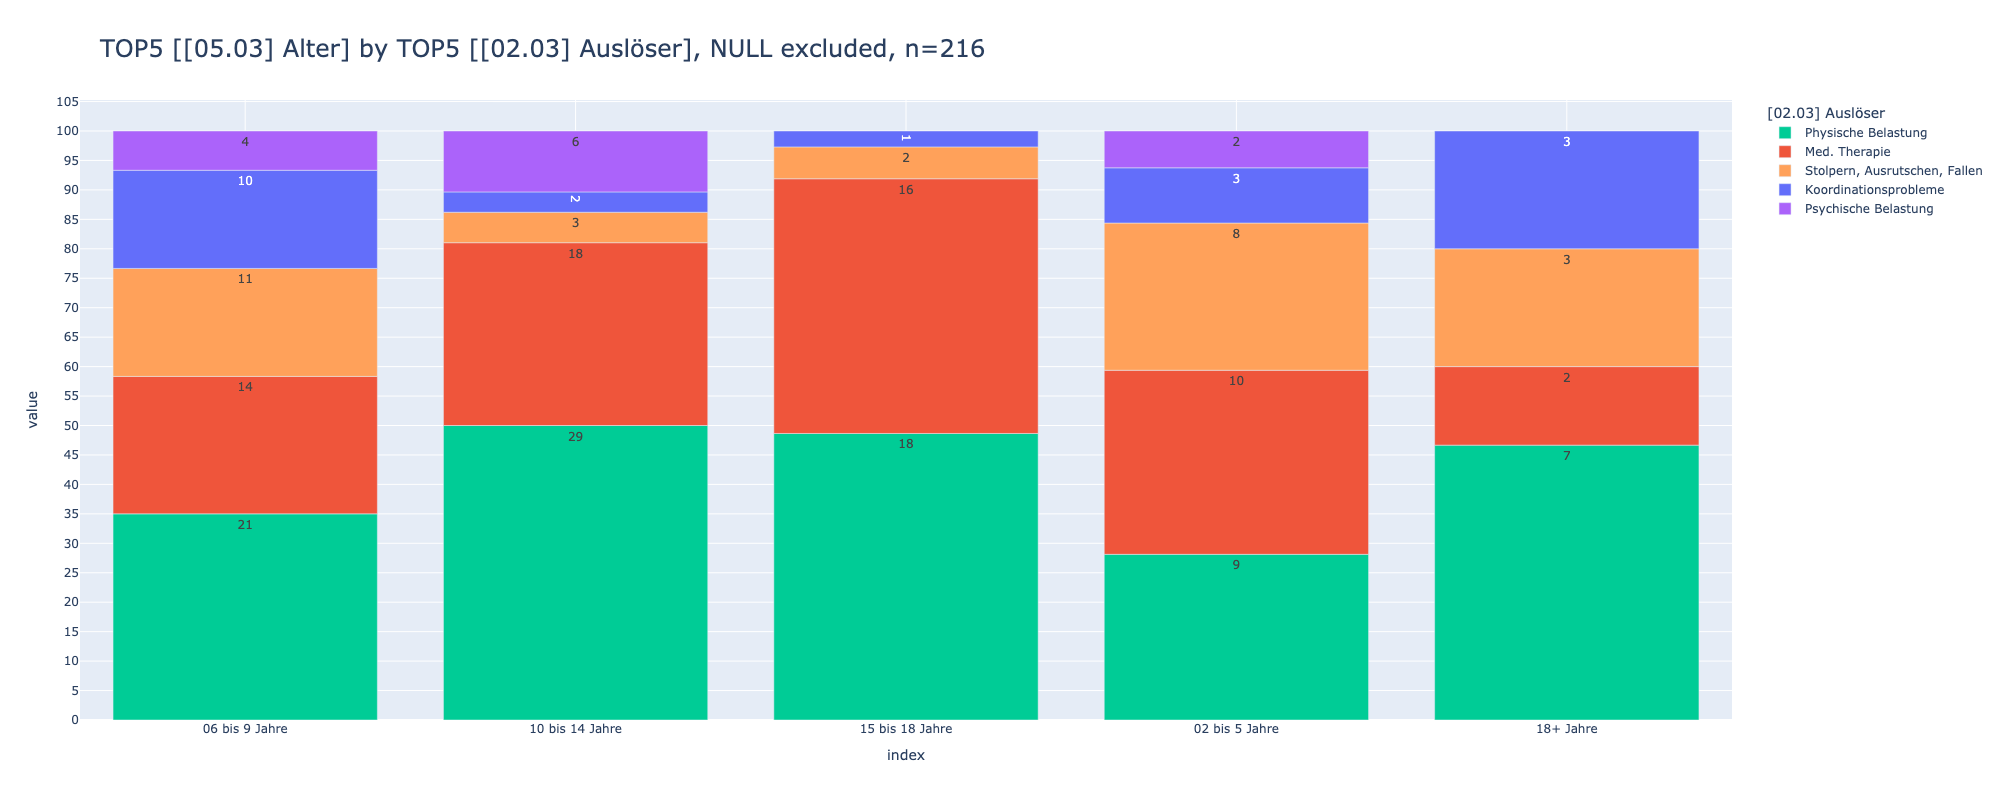

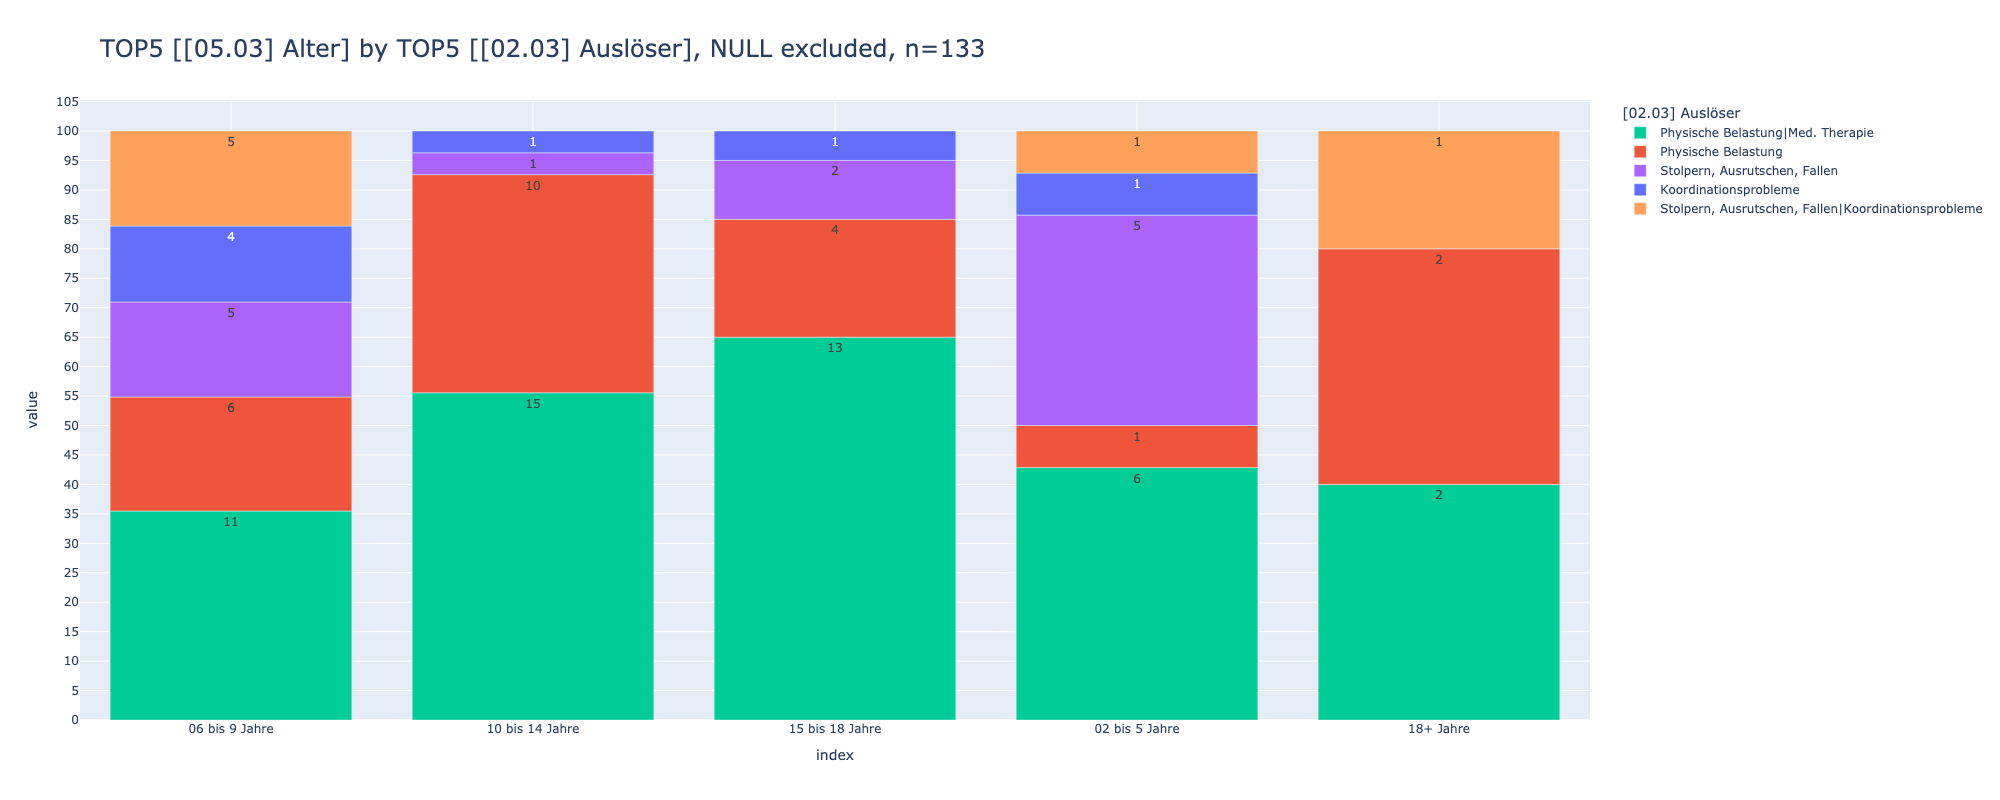

In [57]:
slide4=df_slides.find_cols([
    "[02.03]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

### slide 9

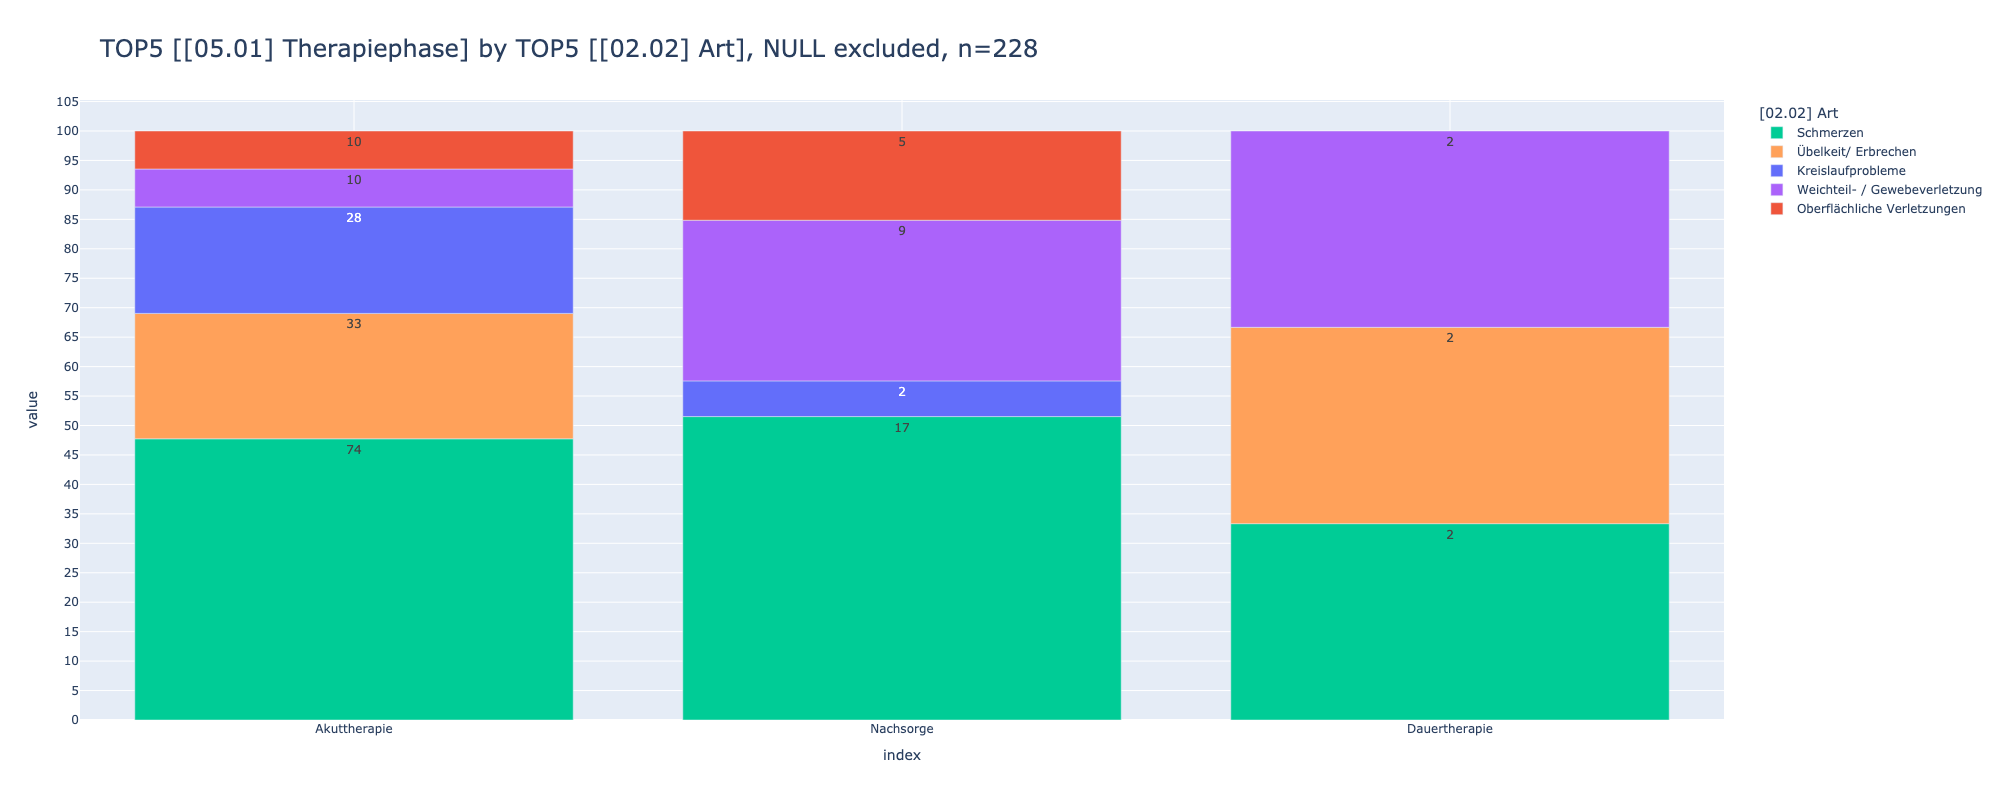

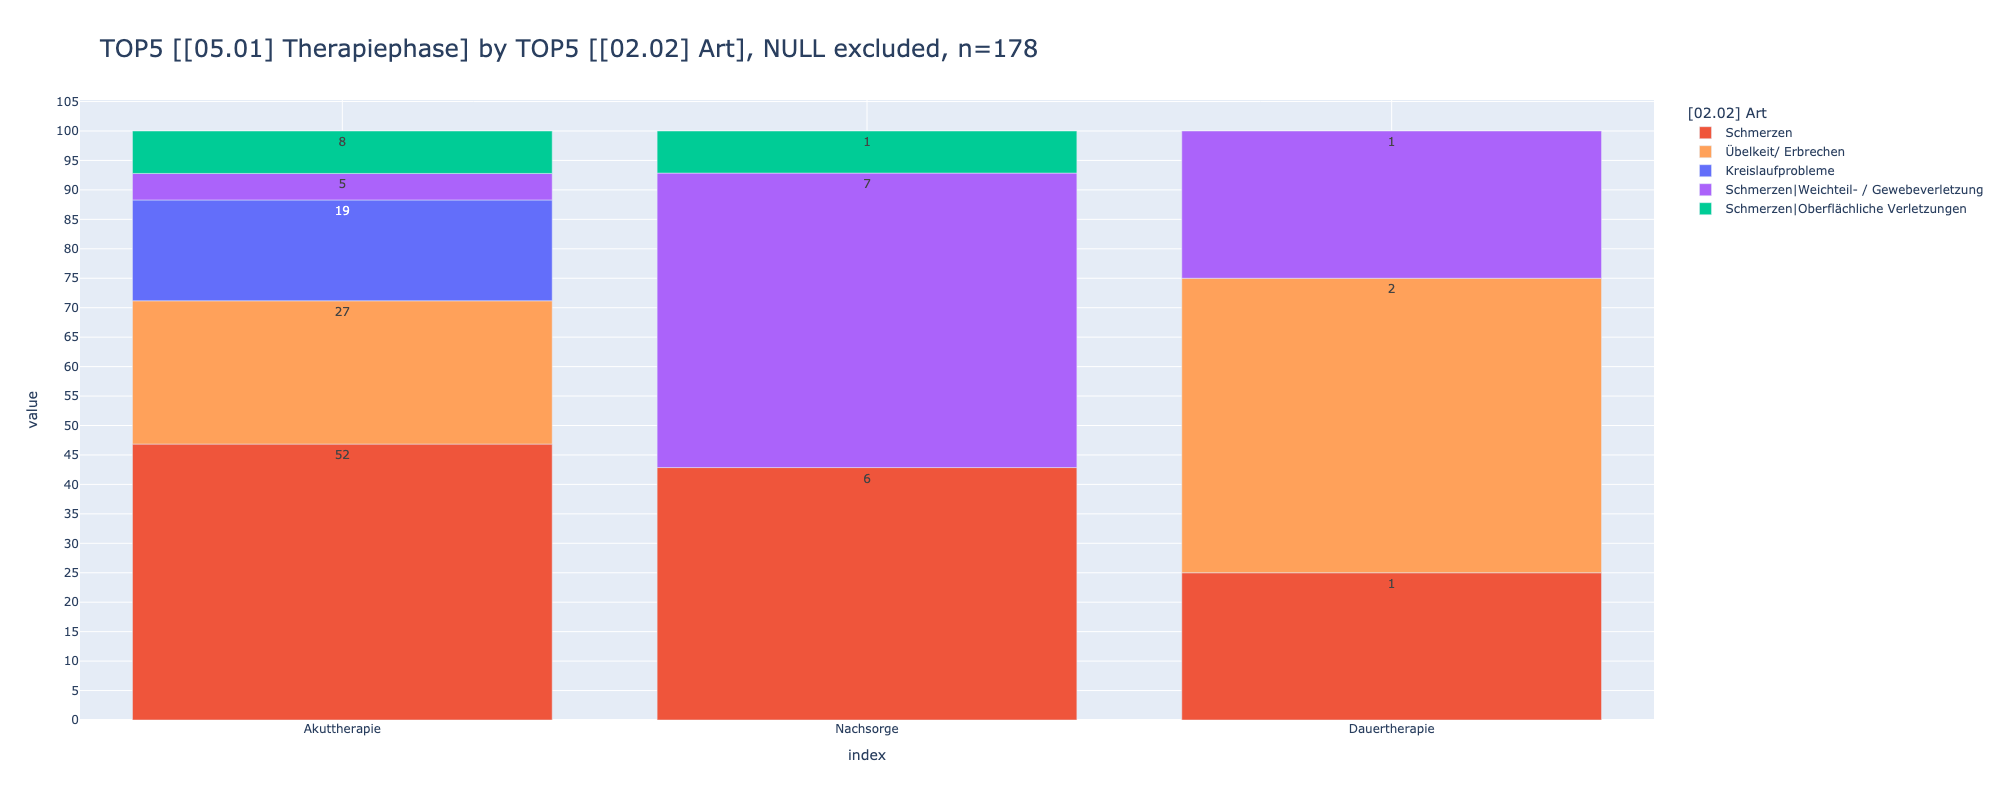

In [60]:
slide4=df_slides.find_cols([
    "[05.01]",
    "[02.02]",
    ])
create_multi_chart(df_slides[slide4])
#_df

### slide 10

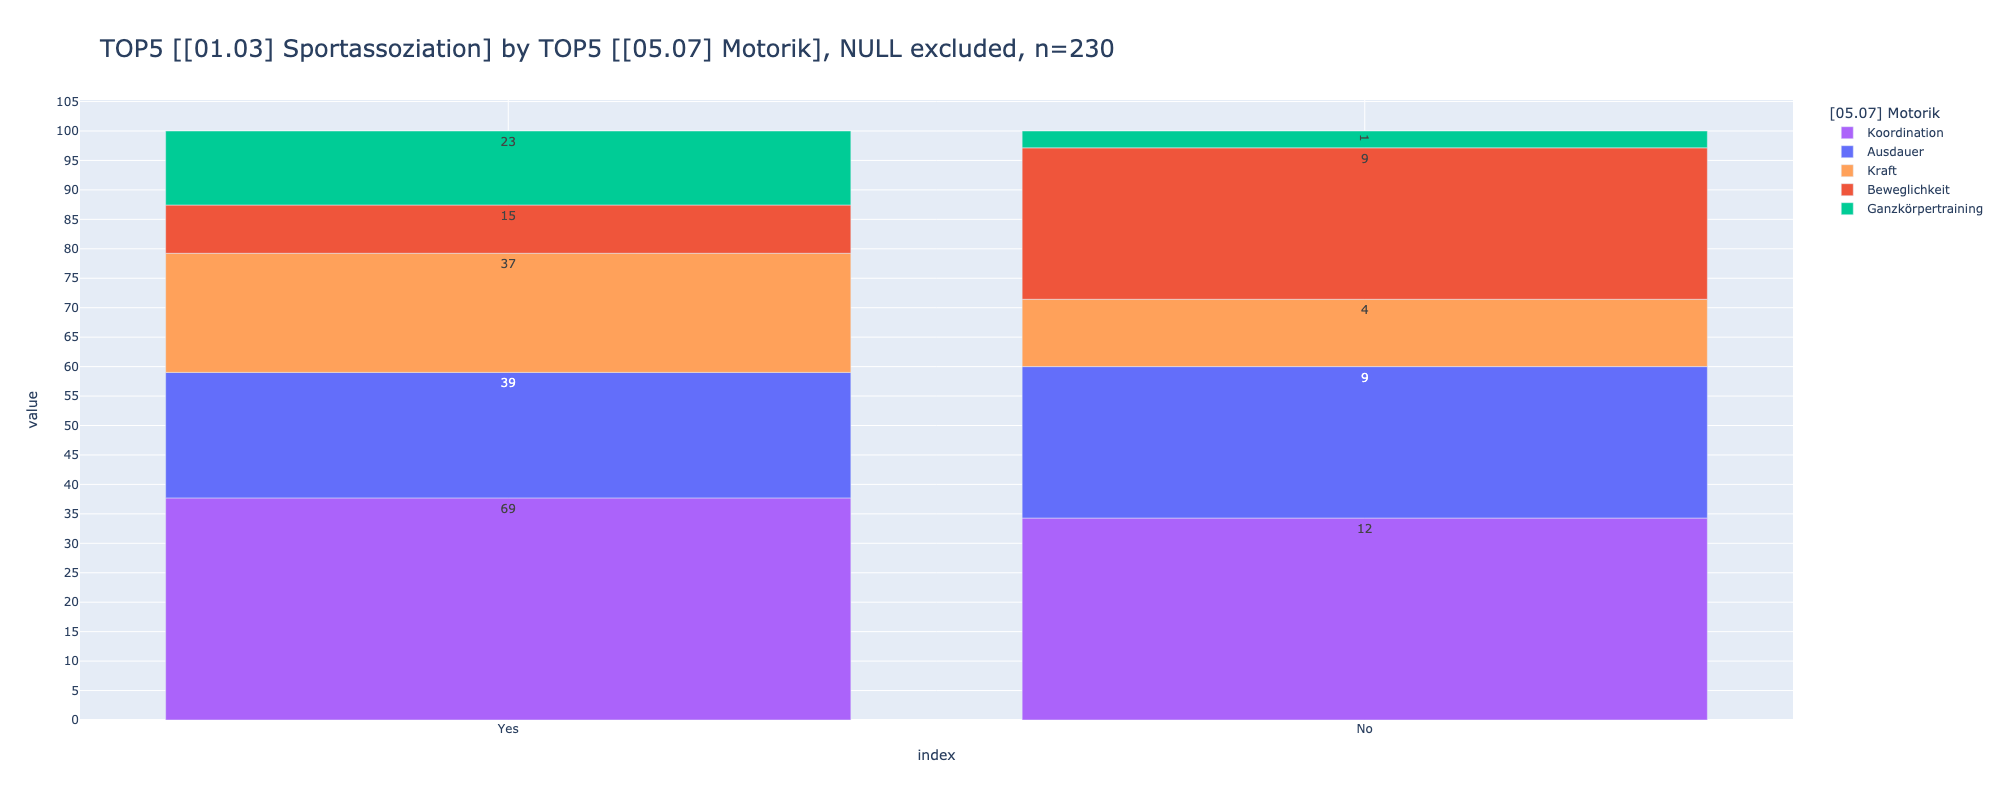

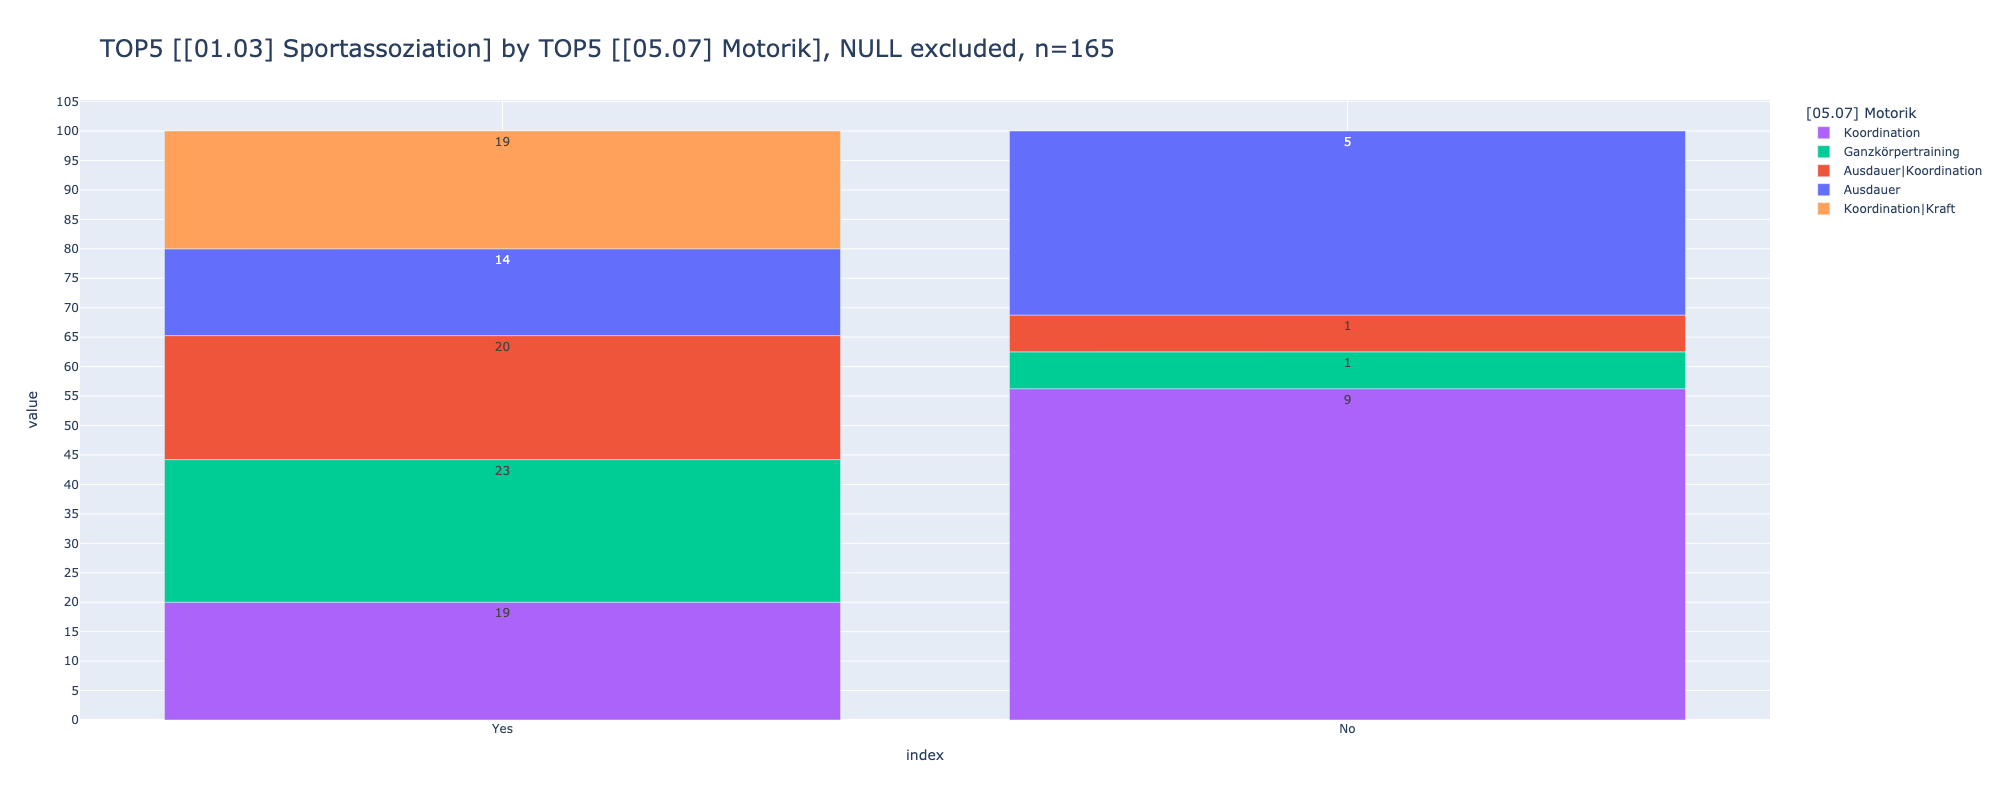

In [ ]:
# bug
slide4=df_slides.find_cols([
    "[01.03]",
    "[05.07]",
    ])
create_multi_chart(df_slides[[slide4[1], slide4[0]]])
#_df

### bonus - ci

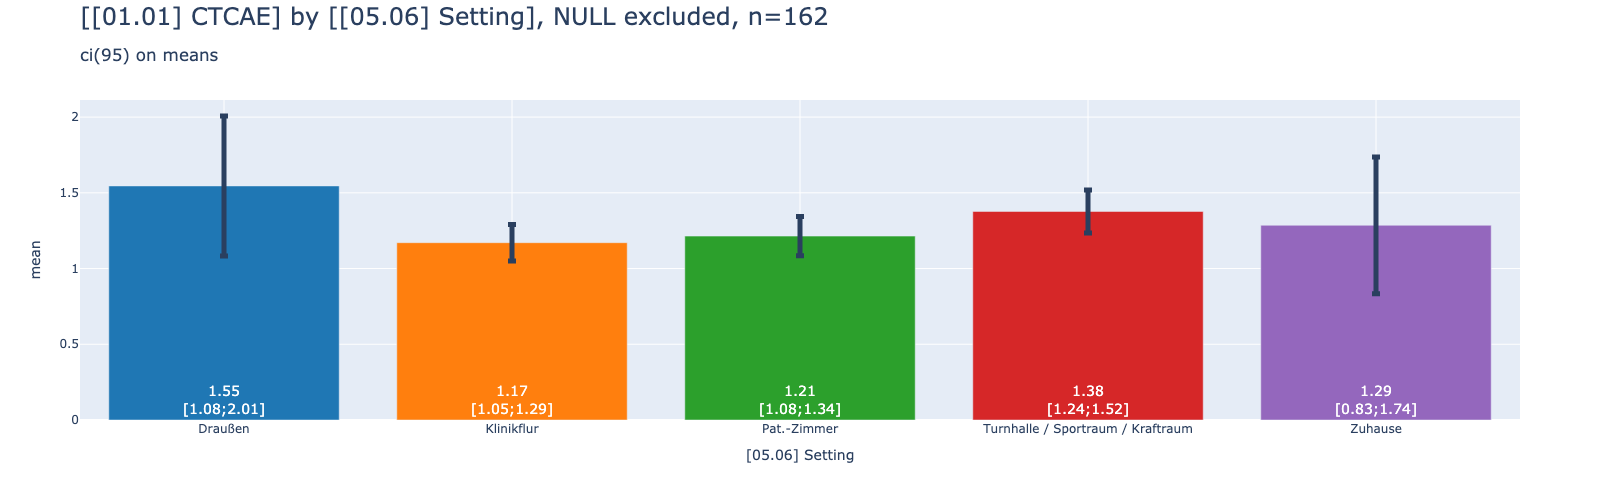

In [46]:
_cols = df_csv_condensed.find_cols(["[05.06]", "[01.01]"])[::-1]
_cols
_df = df_csv_condensed[_cols].dropna()
_df = _df.astype({"[01.01] CTCAE": int})
_=pls.plot_bars(
    _df,
    use_ci=True,
    precision=2,
)